In [6]:
#comparing CNN model for classification
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
!pip install python_speech_features
from python_speech_features import mfcc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

#read csv
df = pd.read_csv('C:/Users/GCS/testaudio/Instrumentstest.csv')
df = df.drop(df.iloc[:,1:52],axis=1)


#load audio
path = 'C:/Users/GCS/testaudio/'
audio_data = list()
for i in tqdm(range(df.shape[0])):
    print(path+ df['Instrument'].iloc[i]+ '/'+ df['File Name'].iloc[i])
    audio_data.append(librosa.load(path+ df['Instrument'].iloc[i]+ '/'+ df['File Name'].iloc[i]))
audio_data = np.array(audio_data)

df['audio_waves'] = audio_data[:,0]
df['samplerate'] = audio_data[:,1]

bit_lengths = list()
for i in range(df.shape[0]):
    bit_lengths.append(len(df['audio_waves'].iloc[i]))
bit_lengths = np.array(bit_lengths)
df['bit_lengths'] = bit_lengths
df['seconds_length'] = df['bit_lengths']/df['samplerate']

df.head()


  0%|                                                                                         | 0/1020 [00:00<?, ?it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-1.wav


  0%|                                                                                 | 1/1020 [00:00<07:11,  2.36it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-2.wav


  0%|▏                                                                                | 2/1020 [00:00<06:50,  2.48it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-3.wav


  0%|▏                                                                                | 3/1020 [00:01<06:40,  2.54it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-4.wav


  0%|▎                                                                                | 4/1020 [00:01<06:31,  2.60it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-5.wav


  0%|▍                                                                                | 5/1020 [00:01<06:22,  2.65it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-6.wav


  1%|▍                                                                                | 6/1020 [00:02<06:17,  2.69it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-7.wav


  1%|▌                                                                                | 7/1020 [00:02<06:12,  2.72it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-8.wav


  1%|▋                                                                                | 8/1020 [00:03<06:09,  2.74it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-9.wav


  1%|▋                                                                                | 9/1020 [00:03<06:06,  2.76it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-10.wav


  1%|▊                                                                               | 10/1020 [00:03<06:12,  2.71it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-11.wav


  1%|▊                                                                               | 11/1020 [00:04<06:11,  2.71it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-12.wav


  1%|▉                                                                               | 12/1020 [00:04<06:08,  2.74it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-13.wav


  1%|█                                                                               | 13/1020 [00:04<06:06,  2.75it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-14.wav


  1%|█                                                                               | 14/1020 [00:05<06:02,  2.78it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-15.wav


  1%|█▏                                                                              | 15/1020 [00:05<06:01,  2.78it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-16.wav


  2%|█▎                                                                              | 16/1020 [00:05<06:20,  2.64it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-17.wav


  2%|█▎                                                                              | 17/1020 [00:06<06:41,  2.50it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-18.wav


  2%|█▍                                                                              | 18/1020 [00:06<06:37,  2.52it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-19.wav


  2%|█▍                                                                              | 19/1020 [00:07<06:32,  2.55it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-20.wav


  2%|█▌                                                                              | 20/1020 [00:07<06:25,  2.59it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-21.wav


  2%|█▋                                                                              | 21/1020 [00:07<06:29,  2.56it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-22.wav


  2%|█▋                                                                              | 22/1020 [00:08<06:19,  2.63it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-23.wav


  2%|█▊                                                                              | 23/1020 [00:08<06:29,  2.56it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-24.wav


  2%|█▉                                                                              | 24/1020 [00:09<06:40,  2.49it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-25.wav


  2%|█▉                                                                              | 25/1020 [00:09<06:36,  2.51it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-26.wav


  3%|██                                                                              | 26/1020 [00:09<06:25,  2.58it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-27.wav


  3%|██                                                                              | 27/1020 [00:10<06:20,  2.61it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-28.wav


  3%|██▏                                                                             | 28/1020 [00:10<06:11,  2.67it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-29.wav


  3%|██▎                                                                             | 29/1020 [00:11<06:13,  2.65it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-30.wav


  3%|██▎                                                                             | 30/1020 [00:11<06:20,  2.60it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium1.wav


  3%|██▍                                                                             | 31/1020 [00:11<06:15,  2.64it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium2.wav


  3%|██▌                                                                             | 32/1020 [00:12<06:11,  2.66it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium3.wav


  3%|██▌                                                                             | 33/1020 [00:12<06:08,  2.68it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium4.wav


  3%|██▋                                                                             | 34/1020 [00:12<06:06,  2.69it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium5.wav


  3%|██▋                                                                             | 35/1020 [00:13<06:08,  2.67it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium6.wav


  4%|██▊                                                                             | 36/1020 [00:13<06:07,  2.68it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium7.wav


  4%|██▉                                                                             | 37/1020 [00:14<06:10,  2.65it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium8.wav


  4%|██▉                                                                             | 38/1020 [00:14<06:11,  2.65it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium9.wav


  4%|███                                                                             | 39/1020 [00:14<06:07,  2.67it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium10.wav


  4%|███▏                                                                            | 40/1020 [00:15<06:09,  2.65it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium11.wav


  4%|███▏                                                                            | 41/1020 [00:15<06:12,  2.63it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium12.wav


  4%|███▎                                                                            | 42/1020 [00:15<06:10,  2.64it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium13.wav


  4%|███▎                                                                            | 43/1020 [00:16<06:09,  2.64it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium14.wav


  4%|███▍                                                                            | 44/1020 [00:16<06:06,  2.67it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium15.wav


  4%|███▌                                                                            | 45/1020 [00:17<06:03,  2.68it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium16.wav


  5%|███▌                                                                            | 46/1020 [00:17<06:07,  2.65it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium17.wav


  5%|███▋                                                                            | 47/1020 [00:17<06:15,  2.59it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium18.wav


  5%|███▊                                                                            | 48/1020 [00:18<06:14,  2.60it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium19.wav


  5%|███▊                                                                            | 49/1020 [00:18<06:08,  2.63it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium20.wav


  5%|███▉                                                                            | 50/1020 [00:18<06:05,  2.65it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium21.wav


  5%|████                                                                            | 51/1020 [00:19<06:10,  2.61it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium22.wav


  5%|████                                                                            | 52/1020 [00:19<06:38,  2.43it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium23.wav


  5%|████▏                                                                           | 53/1020 [00:20<06:46,  2.38it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium24.wav


  5%|████▏                                                                           | 54/1020 [00:20<06:49,  2.36it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium25.wav


  5%|████▎                                                                           | 55/1020 [00:21<06:35,  2.44it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium26.wav


  5%|████▍                                                                           | 56/1020 [00:21<06:21,  2.53it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium27.wav


  6%|████▍                                                                           | 57/1020 [00:21<06:20,  2.53it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium28.wav


  6%|████▌                                                                           | 58/1020 [00:22<06:14,  2.57it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium29.wav


  6%|████▋                                                                           | 59/1020 [00:22<06:06,  2.62it/s]

C:/Users/GCS/testaudio/Harmonium/Harmonium30.wav


  6%|████▋                                                                           | 60/1020 [00:22<06:03,  2.64it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-1.wav


  6%|████▊                                                                           | 61/1020 [00:23<05:55,  2.70it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-2.wav


  6%|████▊                                                                           | 62/1020 [00:23<06:17,  2.54it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-3.wav


  6%|████▉                                                                           | 63/1020 [00:24<06:13,  2.56it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-4.wav


  6%|█████                                                                           | 64/1020 [00:24<06:05,  2.61it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-5.wav


  6%|█████                                                                           | 65/1020 [00:24<05:56,  2.68it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-6.wav


  6%|█████▏                                                                          | 66/1020 [00:25<05:50,  2.72it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-7.wav


  7%|█████▎                                                                          | 67/1020 [00:25<05:41,  2.79it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-8.wav


  7%|█████▎                                                                          | 68/1020 [00:25<05:49,  2.73it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-9.wav


  7%|█████▍                                                                          | 69/1020 [00:26<06:00,  2.64it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-10.wav


  7%|█████▍                                                                          | 70/1020 [00:26<05:55,  2.68it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-11.wav


  7%|█████▌                                                                          | 71/1020 [00:27<05:54,  2.68it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-12.wav


  7%|█████▋                                                                          | 72/1020 [00:27<05:53,  2.68it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-13.wav


  7%|█████▋                                                                          | 73/1020 [00:27<05:44,  2.75it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-14.wav


  7%|█████▊                                                                          | 74/1020 [00:28<05:56,  2.65it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-15.wav


  7%|█████▉                                                                          | 75/1020 [00:28<05:52,  2.68it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-16.wav


  7%|█████▉                                                                          | 76/1020 [00:28<05:49,  2.70it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-17.wav


  8%|██████                                                                          | 77/1020 [00:29<05:43,  2.74it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-18.wav


  8%|██████                                                                          | 78/1020 [00:29<05:34,  2.81it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-19.wav


  8%|██████▏                                                                         | 79/1020 [00:29<05:34,  2.82it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-20.wav


  8%|██████▎                                                                         | 80/1020 [00:30<05:35,  2.80it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-21.wav


  8%|██████▎                                                                         | 81/1020 [00:30<05:44,  2.72it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-22.wav


  8%|██████▍                                                                         | 82/1020 [00:31<05:59,  2.61it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-23.wav


  8%|██████▌                                                                         | 83/1020 [00:31<05:58,  2.61it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-24.wav


  8%|██████▌                                                                         | 84/1020 [00:31<05:52,  2.66it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-25.wav


  8%|██████▋                                                                         | 85/1020 [00:32<05:40,  2.75it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-26.wav


  8%|██████▋                                                                         | 86/1020 [00:32<05:38,  2.76it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-27.wav


  9%|██████▊                                                                         | 87/1020 [00:32<05:34,  2.79it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-28.wav


  9%|██████▉                                                                         | 88/1020 [00:33<05:49,  2.67it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-29.wav


  9%|██████▉                                                                         | 89/1020 [00:33<05:50,  2.65it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-30.wav


  9%|███████                                                                         | 90/1020 [00:34<05:54,  2.62it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam1.wav


  9%|███████▏                                                                        | 91/1020 [00:34<05:49,  2.66it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam2.wav


  9%|███████▏                                                                        | 92/1020 [00:34<05:52,  2.63it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam3.wav


  9%|███████▎                                                                        | 93/1020 [00:35<05:59,  2.58it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam4.wav


  9%|███████▎                                                                        | 94/1020 [00:35<06:23,  2.42it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam5.wav


  9%|███████▍                                                                        | 95/1020 [00:36<06:34,  2.35it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam6.wav


  9%|███████▌                                                                        | 96/1020 [00:36<06:17,  2.45it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam7.wav


 10%|███████▌                                                                        | 97/1020 [00:36<06:12,  2.48it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam8.wav


 10%|███████▋                                                                        | 98/1020 [00:37<06:08,  2.50it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam9.wav


 10%|███████▊                                                                        | 99/1020 [00:37<06:14,  2.46it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam10.wav


 10%|███████▋                                                                       | 100/1020 [00:38<06:22,  2.41it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam11.wav


 10%|███████▊                                                                       | 101/1020 [00:38<06:22,  2.41it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam12.wav


 10%|███████▉                                                                       | 102/1020 [00:39<06:14,  2.45it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam13.wav


 10%|███████▉                                                                       | 103/1020 [00:39<06:13,  2.46it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam14.wav


 10%|████████                                                                       | 104/1020 [00:39<06:07,  2.50it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam15.wav


 10%|████████▏                                                                      | 105/1020 [00:40<06:07,  2.49it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam16.wav


 10%|████████▏                                                                      | 106/1020 [00:40<06:20,  2.40it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam17.wav


 10%|████████▎                                                                      | 107/1020 [00:41<06:31,  2.33it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam18.wav


 11%|████████▎                                                                      | 108/1020 [00:41<06:27,  2.35it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam19.wav


 11%|████████▍                                                                      | 109/1020 [00:41<06:21,  2.39it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam20.wav


 11%|████████▌                                                                      | 110/1020 [00:42<06:10,  2.46it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam21.wav


 11%|████████▌                                                                      | 111/1020 [00:42<06:01,  2.51it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam22.wav


 11%|████████▋                                                                      | 112/1020 [00:43<05:53,  2.57it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam23.wav


 11%|████████▊                                                                      | 113/1020 [00:43<05:50,  2.59it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam24.wav


 11%|████████▊                                                                      | 114/1020 [00:43<05:42,  2.65it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam25.wav


 11%|████████▉                                                                      | 115/1020 [00:44<05:42,  2.65it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam26.wav


 11%|████████▉                                                                      | 116/1020 [00:44<05:43,  2.63it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam27.wav


 11%|█████████                                                                      | 117/1020 [00:44<05:38,  2.67it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam28.wav


 12%|█████████▏                                                                     | 118/1020 [00:45<05:35,  2.69it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam29.wav


 12%|█████████▏                                                                     | 119/1020 [00:45<05:31,  2.72it/s]

C:/Users/GCS/testaudio/Mrudangam/Mrudangam30.wav


 12%|█████████▎                                                                     | 120/1020 [00:46<05:33,  2.70it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram1.wav


 12%|█████████▎                                                                     | 121/1020 [00:46<05:34,  2.69it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram2.wav


 12%|█████████▍                                                                     | 122/1020 [00:46<05:44,  2.61it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram3.wav


 12%|█████████▌                                                                     | 123/1020 [00:47<05:58,  2.50it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram4.wav


 12%|█████████▌                                                                     | 124/1020 [00:47<06:04,  2.46it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram5.wav


 12%|█████████▋                                                                     | 125/1020 [00:48<05:55,  2.52it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram6.wav


 12%|█████████▊                                                                     | 126/1020 [00:48<06:07,  2.44it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram7.wav


 12%|█████████▊                                                                     | 127/1020 [00:48<06:01,  2.47it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram8.wav


 13%|█████████▉                                                                     | 128/1020 [00:49<05:57,  2.50it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram9.wav


 13%|█████████▉                                                                     | 129/1020 [00:49<05:56,  2.50it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram10.wav


 13%|██████████                                                                     | 130/1020 [00:50<05:47,  2.56it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram11.wav


 13%|██████████▏                                                                    | 131/1020 [00:50<05:56,  2.49it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram12.wav


 13%|██████████▏                                                                    | 132/1020 [00:50<06:00,  2.46it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram13.wav


 13%|██████████▎                                                                    | 133/1020 [00:51<06:19,  2.34it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram14.wav


 13%|██████████▍                                                                    | 134/1020 [00:51<06:09,  2.39it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram15.wav


 13%|██████████▍                                                                    | 135/1020 [00:52<05:59,  2.46it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram16.wav


 13%|██████████▌                                                                    | 136/1020 [00:52<05:54,  2.49it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram17.wav


 13%|██████████▌                                                                    | 137/1020 [00:52<05:50,  2.52it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram18.wav


 14%|██████████▋                                                                    | 138/1020 [00:53<06:03,  2.43it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram19.wav


 14%|██████████▊                                                                    | 139/1020 [00:53<06:12,  2.36it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram20.wav


 14%|██████████▊                                                                    | 140/1020 [00:54<06:07,  2.39it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram21.wav


 14%|██████████▉                                                                    | 141/1020 [00:54<05:57,  2.46it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram22.wav


 14%|██████████▉                                                                    | 142/1020 [00:54<05:50,  2.50it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram23.wav


 14%|███████████                                                                    | 143/1020 [00:55<05:57,  2.45it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram24.wav


 14%|███████████▏                                                                   | 144/1020 [00:55<06:10,  2.37it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram25.wav


 14%|███████████▏                                                                   | 145/1020 [00:56<06:03,  2.41it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram26.wav


 14%|███████████▎                                                                   | 146/1020 [00:56<05:58,  2.44it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram27.wav


 14%|███████████▍                                                                   | 147/1020 [00:57<05:52,  2.48it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram28.wav


 15%|███████████▍                                                                   | 148/1020 [00:57<05:55,  2.45it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram29.wav


 15%|███████████▌                                                                   | 149/1020 [00:57<06:12,  2.34it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram30.wav


 15%|███████████▌                                                                   | 150/1020 [00:58<06:22,  2.28it/s]

C:/Users/GCS/testaudio/Santoor/santoor1.wav


 15%|███████████▋                                                                   | 151/1020 [00:58<06:07,  2.36it/s]

C:/Users/GCS/testaudio/Santoor/santoor2.wav


 15%|███████████▊                                                                   | 152/1020 [00:59<05:57,  2.43it/s]

C:/Users/GCS/testaudio/Santoor/santoor3.wav


 15%|███████████▊                                                                   | 153/1020 [00:59<05:49,  2.48it/s]

C:/Users/GCS/testaudio/Santoor/santoor4.wav


 15%|███████████▉                                                                   | 154/1020 [00:59<05:41,  2.53it/s]

C:/Users/GCS/testaudio/Santoor/santoor5.wav


 15%|████████████                                                                   | 155/1020 [01:00<05:59,  2.41it/s]

C:/Users/GCS/testaudio/Santoor/santoor6.wav


 15%|████████████                                                                   | 156/1020 [01:00<06:08,  2.35it/s]

C:/Users/GCS/testaudio/Santoor/santoor7.wav


 15%|████████████▏                                                                  | 157/1020 [01:01<06:00,  2.40it/s]

C:/Users/GCS/testaudio/Santoor/santoor8.wav


 15%|████████████▏                                                                  | 158/1020 [01:01<05:42,  2.52it/s]

C:/Users/GCS/testaudio/Santoor/santoor9.wav


 16%|████████████▎                                                                  | 159/1020 [01:01<05:31,  2.60it/s]

C:/Users/GCS/testaudio/Santoor/santoor10.wav


 16%|████████████▍                                                                  | 160/1020 [01:02<05:27,  2.63it/s]

C:/Users/GCS/testaudio/Santoor/santoor11.wav


 16%|████████████▍                                                                  | 161/1020 [01:02<05:53,  2.43it/s]

C:/Users/GCS/testaudio/Santoor/santoor12.wav


 16%|████████████▌                                                                  | 162/1020 [01:03<05:52,  2.44it/s]

C:/Users/GCS/testaudio/Santoor/santoor13.wav


 16%|████████████▌                                                                  | 163/1020 [01:03<05:41,  2.51it/s]

C:/Users/GCS/testaudio/Santoor/santoor14.wav


 16%|████████████▋                                                                  | 164/1020 [01:03<05:45,  2.48it/s]

C:/Users/GCS/testaudio/Santoor/santoor15.wav


 16%|████████████▊                                                                  | 165/1020 [01:04<05:51,  2.43it/s]

C:/Users/GCS/testaudio/Santoor/santoor16.wav


 16%|████████████▊                                                                  | 166/1020 [01:04<05:49,  2.44it/s]

C:/Users/GCS/testaudio/Santoor/santoor17.wav


 16%|████████████▉                                                                  | 167/1020 [01:05<05:46,  2.46it/s]

C:/Users/GCS/testaudio/Santoor/santoor18.wav


 16%|█████████████                                                                  | 168/1020 [01:05<05:44,  2.47it/s]

C:/Users/GCS/testaudio/Santoor/santoor19.wav


 17%|█████████████                                                                  | 169/1020 [01:06<05:40,  2.50it/s]

C:/Users/GCS/testaudio/Santoor/santoor20.wav


 17%|█████████████▏                                                                 | 170/1020 [01:06<05:36,  2.53it/s]

C:/Users/GCS/testaudio/Santoor/santoor21.wav


 17%|█████████████▏                                                                 | 171/1020 [01:06<05:31,  2.56it/s]

C:/Users/GCS/testaudio/Santoor/santoor22.wav


 17%|█████████████▎                                                                 | 172/1020 [01:07<05:29,  2.58it/s]

C:/Users/GCS/testaudio/Santoor/santoor23.wav


 17%|█████████████▍                                                                 | 173/1020 [01:07<05:27,  2.59it/s]

C:/Users/GCS/testaudio/Santoor/santoor24.wav


 17%|█████████████▍                                                                 | 174/1020 [01:07<05:31,  2.55it/s]

C:/Users/GCS/testaudio/Santoor/santoor25.wav


 17%|█████████████▌                                                                 | 175/1020 [01:08<05:22,  2.62it/s]

C:/Users/GCS/testaudio/Santoor/santoor26.wav


 17%|█████████████▋                                                                 | 176/1020 [01:08<05:22,  2.62it/s]

C:/Users/GCS/testaudio/Santoor/santoor27.wav


 17%|█████████████▋                                                                 | 177/1020 [01:09<05:17,  2.65it/s]

C:/Users/GCS/testaudio/Santoor/santoor28.wav


 17%|█████████████▊                                                                 | 178/1020 [01:09<06:08,  2.28it/s]

C:/Users/GCS/testaudio/Santoor/santoor29.wav


 18%|█████████████▊                                                                 | 179/1020 [01:10<06:00,  2.33it/s]

C:/Users/GCS/testaudio/Santoor/santoor30.wav


 18%|█████████████▉                                                                 | 180/1020 [01:10<05:48,  2.41it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-1.wav


 18%|██████████████                                                                 | 181/1020 [01:10<05:59,  2.33it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-2.wav


 18%|██████████████                                                                 | 182/1020 [01:11<05:54,  2.36it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-3.wav


 18%|██████████████▏                                                                | 183/1020 [01:11<05:41,  2.45it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-4.wav


 18%|██████████████▎                                                                | 184/1020 [01:12<05:33,  2.50it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-5.wav


 18%|██████████████▎                                                                | 185/1020 [01:12<05:21,  2.60it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-6.wav


 18%|██████████████▍                                                                | 186/1020 [01:12<05:12,  2.67it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-7.wav


 18%|██████████████▍                                                                | 187/1020 [01:13<05:07,  2.71it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-8.wav


 18%|██████████████▌                                                                | 188/1020 [01:13<05:02,  2.75it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-9.wav


 19%|██████████████▋                                                                | 189/1020 [01:13<05:01,  2.75it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-10.wav


 19%|██████████████▋                                                                | 190/1020 [01:14<04:59,  2.77it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-11.wav


 19%|██████████████▊                                                                | 191/1020 [01:14<04:54,  2.81it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-12.wav


 19%|██████████████▊                                                                | 192/1020 [01:14<04:54,  2.81it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-13.wav


 19%|██████████████▉                                                                | 193/1020 [01:15<04:50,  2.85it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-14.wav


 19%|███████████████                                                                | 194/1020 [01:15<04:50,  2.84it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-15.wav


 19%|███████████████                                                                | 195/1020 [01:15<04:52,  2.82it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-16.wav


 19%|███████████████▏                                                               | 196/1020 [01:16<04:48,  2.86it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-17.wav


 19%|███████████████▎                                                               | 197/1020 [01:16<04:45,  2.88it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-18.wav


 19%|███████████████▎                                                               | 198/1020 [01:16<04:51,  2.82it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-19.wav


 20%|███████████████▍                                                               | 199/1020 [01:17<04:49,  2.83it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-20.wav


 20%|███████████████▍                                                               | 200/1020 [01:17<04:55,  2.77it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-21.wav


 20%|███████████████▌                                                               | 201/1020 [01:18<04:55,  2.77it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-22.wav


 20%|███████████████▋                                                               | 202/1020 [01:18<04:52,  2.79it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-23.wav


 20%|███████████████▋                                                               | 203/1020 [01:18<04:50,  2.81it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-24.wav


 20%|███████████████▊                                                               | 204/1020 [01:19<04:48,  2.83it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-25.wav


 20%|███████████████▉                                                               | 205/1020 [01:19<04:49,  2.81it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-26.wav


 20%|███████████████▉                                                               | 206/1020 [01:19<04:47,  2.84it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-27.wav


 20%|████████████████                                                               | 207/1020 [01:20<04:43,  2.86it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-28.wav


 20%|████████████████                                                               | 208/1020 [01:20<04:46,  2.84it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-29.wav


 20%|████████████████▏                                                              | 209/1020 [01:20<04:43,  2.86it/s]

C:/Users/GCS/testaudio/Sarangi/sarangi-30.wav


 21%|████████████████▎                                                              | 210/1020 [01:21<04:48,  2.81it/s]

C:/Users/GCS/testaudio/Sitar/sitar-1.wav


 21%|████████████████▎                                                              | 211/1020 [01:21<04:47,  2.81it/s]

C:/Users/GCS/testaudio/Sitar/sitar-2.wav


 21%|████████████████▍                                                              | 212/1020 [01:21<04:46,  2.82it/s]

C:/Users/GCS/testaudio/Sitar/sitar-3.wav


 21%|████████████████▍                                                              | 213/1020 [01:22<04:48,  2.80it/s]

C:/Users/GCS/testaudio/Sitar/sitar-4.wav


 21%|████████████████▌                                                              | 214/1020 [01:22<04:47,  2.80it/s]

C:/Users/GCS/testaudio/Sitar/sitar-5.wav


 21%|████████████████▋                                                              | 215/1020 [01:23<04:54,  2.74it/s]

C:/Users/GCS/testaudio/Sitar/sitar-6.wav


 21%|████████████████▋                                                              | 216/1020 [01:23<04:47,  2.80it/s]

C:/Users/GCS/testaudio/Sitar/sitar-7.wav


 21%|████████████████▊                                                              | 217/1020 [01:23<04:47,  2.80it/s]

C:/Users/GCS/testaudio/Sitar/sitar-8.wav


 21%|████████████████▉                                                              | 218/1020 [01:24<04:45,  2.81it/s]

C:/Users/GCS/testaudio/Sitar/sitar-9.wav


 21%|████████████████▉                                                              | 219/1020 [01:24<04:47,  2.79it/s]

C:/Users/GCS/testaudio/Sitar/sitar-10.wav


 22%|█████████████████                                                              | 220/1020 [01:24<04:42,  2.83it/s]

C:/Users/GCS/testaudio/Sitar/sitar-11.wav


 22%|█████████████████                                                              | 221/1020 [01:25<04:44,  2.81it/s]

C:/Users/GCS/testaudio/Sitar/sitar-12.wav


 22%|█████████████████▏                                                             | 222/1020 [01:25<04:48,  2.77it/s]

C:/Users/GCS/testaudio/Sitar/sitar-13.wav


 22%|█████████████████▎                                                             | 223/1020 [01:25<04:49,  2.75it/s]

C:/Users/GCS/testaudio/Sitar/sitar-14.wav


 22%|█████████████████▎                                                             | 224/1020 [01:26<04:50,  2.74it/s]

C:/Users/GCS/testaudio/Sitar/sitar-15.wav


 22%|█████████████████▍                                                             | 225/1020 [01:26<04:47,  2.76it/s]

C:/Users/GCS/testaudio/Sitar/sitar-16.wav


 22%|█████████████████▌                                                             | 226/1020 [01:27<04:58,  2.66it/s]

C:/Users/GCS/testaudio/Sitar/sitar-17.wav


 22%|█████████████████▌                                                             | 227/1020 [01:27<05:05,  2.59it/s]

C:/Users/GCS/testaudio/Sitar/sitar-18.wav


 22%|█████████████████▋                                                             | 228/1020 [01:27<05:00,  2.64it/s]

C:/Users/GCS/testaudio/Sitar/sitar-19.wav


 22%|█████████████████▋                                                             | 229/1020 [01:28<04:52,  2.70it/s]

C:/Users/GCS/testaudio/Sitar/sitar-20.wav


 23%|█████████████████▊                                                             | 230/1020 [01:28<04:56,  2.66it/s]

C:/Users/GCS/testaudio/Sitar/sitar-21.wav


 23%|█████████████████▉                                                             | 231/1020 [01:28<04:56,  2.66it/s]

C:/Users/GCS/testaudio/Sitar/sitar-22.wav


 23%|█████████████████▉                                                             | 232/1020 [01:29<05:07,  2.56it/s]

C:/Users/GCS/testaudio/Sitar/sitar-23.wav


 23%|██████████████████                                                             | 233/1020 [01:29<05:10,  2.54it/s]

C:/Users/GCS/testaudio/Sitar/sitar-24.wav


 23%|██████████████████                                                             | 234/1020 [01:30<05:00,  2.62it/s]

C:/Users/GCS/testaudio/Sitar/sitar-25.wav


 23%|██████████████████▏                                                            | 235/1020 [01:30<05:30,  2.38it/s]

C:/Users/GCS/testaudio/Sitar/sitar-26.wav


 23%|██████████████████▎                                                            | 236/1020 [01:31<05:35,  2.33it/s]

C:/Users/GCS/testaudio/Sitar/sitar-27.wav


 23%|██████████████████▎                                                            | 237/1020 [01:31<05:36,  2.33it/s]

C:/Users/GCS/testaudio/Sitar/sitar-28.wav


 23%|██████████████████▍                                                            | 238/1020 [01:31<05:23,  2.42it/s]

C:/Users/GCS/testaudio/Sitar/sitar-29.wav


 23%|██████████████████▌                                                            | 239/1020 [01:32<05:08,  2.53it/s]

C:/Users/GCS/testaudio/Sitar/sitar-30.wav


 24%|██████████████████▌                                                            | 240/1020 [01:32<05:11,  2.50it/s]

C:/Users/GCS/testaudio/Tabla/Tabla1.wav


 24%|██████████████████▋                                                            | 241/1020 [01:33<05:11,  2.50it/s]

C:/Users/GCS/testaudio/Tabla/Tabla2.wav


 24%|██████████████████▋                                                            | 242/1020 [01:33<05:17,  2.45it/s]

C:/Users/GCS/testaudio/Tabla/Tabla3.wav


 24%|██████████████████▊                                                            | 243/1020 [01:33<05:20,  2.43it/s]

C:/Users/GCS/testaudio/Tabla/Tabla4.wav


 24%|██████████████████▉                                                            | 244/1020 [01:34<05:10,  2.50it/s]

C:/Users/GCS/testaudio/Tabla/Tabla5.wav


 24%|██████████████████▉                                                            | 245/1020 [01:34<05:07,  2.52it/s]

C:/Users/GCS/testaudio/Tabla/Tabla6.wav


 24%|███████████████████                                                            | 246/1020 [01:35<05:01,  2.57it/s]

C:/Users/GCS/testaudio/Tabla/Tabla7.wav


 24%|███████████████████▏                                                           | 247/1020 [01:35<04:59,  2.58it/s]

C:/Users/GCS/testaudio/Tabla/Tabla8.wav


 24%|███████████████████▏                                                           | 248/1020 [01:35<04:55,  2.61it/s]

C:/Users/GCS/testaudio/Tabla/Tabla9.wav


 24%|███████████████████▎                                                           | 249/1020 [01:36<04:52,  2.64it/s]

C:/Users/GCS/testaudio/Tabla/Tabla10.wav


 25%|███████████████████▎                                                           | 250/1020 [01:36<04:51,  2.64it/s]

C:/Users/GCS/testaudio/Tabla/Tabla11.wav


 25%|███████████████████▍                                                           | 251/1020 [01:36<04:53,  2.62it/s]

C:/Users/GCS/testaudio/Tabla/Tabla12.wav


 25%|███████████████████▌                                                           | 252/1020 [01:37<04:46,  2.68it/s]

C:/Users/GCS/testaudio/Tabla/Tabla13.wav


 25%|███████████████████▌                                                           | 253/1020 [01:37<04:44,  2.70it/s]

C:/Users/GCS/testaudio/Tabla/Tabla14.wav


 25%|███████████████████▋                                                           | 254/1020 [01:37<04:44,  2.70it/s]

C:/Users/GCS/testaudio/Tabla/Tabla15.wav


 25%|███████████████████▊                                                           | 255/1020 [01:38<04:45,  2.68it/s]

C:/Users/GCS/testaudio/Tabla/Tabla16.wav


 25%|███████████████████▊                                                           | 256/1020 [01:38<04:45,  2.67it/s]

C:/Users/GCS/testaudio/Tabla/Tabla17.wav


 25%|███████████████████▉                                                           | 257/1020 [01:39<04:40,  2.72it/s]

C:/Users/GCS/testaudio/Tabla/Tabla18.wav


 25%|███████████████████▉                                                           | 258/1020 [01:39<04:39,  2.73it/s]

C:/Users/GCS/testaudio/Tabla/Tabla19.wav


 25%|████████████████████                                                           | 259/1020 [01:39<04:41,  2.70it/s]

C:/Users/GCS/testaudio/Tabla/Tabla20.wav


 25%|████████████████████▏                                                          | 260/1020 [01:40<04:40,  2.71it/s]

C:/Users/GCS/testaudio/Tabla/Tabla21.wav


 26%|████████████████████▏                                                          | 261/1020 [01:40<04:36,  2.75it/s]

C:/Users/GCS/testaudio/Tabla/Tabla22.wav


 26%|████████████████████▎                                                          | 262/1020 [01:40<04:37,  2.73it/s]

C:/Users/GCS/testaudio/Tabla/Tabla23.wav


 26%|████████████████████▎                                                          | 263/1020 [01:41<04:35,  2.75it/s]

C:/Users/GCS/testaudio/Tabla/Tabla24.wav


 26%|████████████████████▍                                                          | 264/1020 [01:41<04:38,  2.71it/s]

C:/Users/GCS/testaudio/Tabla/Tabla25.wav


 26%|████████████████████▌                                                          | 265/1020 [01:42<04:38,  2.71it/s]

C:/Users/GCS/testaudio/Tabla/Tabla26.wav


 26%|████████████████████▌                                                          | 266/1020 [01:42<04:38,  2.71it/s]

C:/Users/GCS/testaudio/Tabla/Tabla27.wav


 26%|████████████████████▋                                                          | 267/1020 [01:42<04:41,  2.68it/s]

C:/Users/GCS/testaudio/Tabla/Tabla28.wav


 26%|████████████████████▊                                                          | 268/1020 [01:43<04:39,  2.69it/s]

C:/Users/GCS/testaudio/Tabla/Tabla29.wav


 26%|████████████████████▊                                                          | 269/1020 [01:43<04:34,  2.74it/s]

C:/Users/GCS/testaudio/Tabla/Tabla30.wav


 26%|████████████████████▉                                                          | 270/1020 [01:43<04:34,  2.73it/s]

C:/Users/GCS/testaudio/Veena/Veena1.wav


 27%|████████████████████▉                                                          | 271/1020 [01:44<04:29,  2.77it/s]

C:/Users/GCS/testaudio/Veena/Veena2.wav


 27%|█████████████████████                                                          | 272/1020 [01:44<04:25,  2.82it/s]

C:/Users/GCS/testaudio/Veena/Veena3.wav


 27%|█████████████████████▏                                                         | 273/1020 [01:44<04:21,  2.86it/s]

C:/Users/GCS/testaudio/Veena/Veena4.wav


 27%|█████████████████████▏                                                         | 274/1020 [01:45<04:20,  2.86it/s]

C:/Users/GCS/testaudio/Veena/Veena5.wav


 27%|█████████████████████▎                                                         | 275/1020 [01:45<04:19,  2.87it/s]

C:/Users/GCS/testaudio/Veena/Veena6.wav


 27%|█████████████████████▍                                                         | 276/1020 [01:45<04:13,  2.93it/s]

C:/Users/GCS/testaudio/Veena/Veena7.wav


 27%|█████████████████████▍                                                         | 277/1020 [01:46<04:11,  2.95it/s]

C:/Users/GCS/testaudio/Veena/Veena8.wav


 27%|█████████████████████▌                                                         | 278/1020 [01:46<04:10,  2.96it/s]

C:/Users/GCS/testaudio/Veena/Veena9.wav


 27%|█████████████████████▌                                                         | 279/1020 [01:46<04:09,  2.97it/s]

C:/Users/GCS/testaudio/Veena/Veena10.wav


 27%|█████████████████████▋                                                         | 280/1020 [01:47<04:11,  2.94it/s]

C:/Users/GCS/testaudio/Veena/Veena11.wav


 28%|█████████████████████▊                                                         | 281/1020 [01:47<04:14,  2.91it/s]

C:/Users/GCS/testaudio/Veena/Veena12.wav


 28%|█████████████████████▊                                                         | 282/1020 [01:47<04:09,  2.96it/s]

C:/Users/GCS/testaudio/Veena/Veena13.wav


 28%|█████████████████████▉                                                         | 283/1020 [01:48<04:11,  2.94it/s]

C:/Users/GCS/testaudio/Veena/Veena14.wav


 28%|█████████████████████▉                                                         | 284/1020 [01:48<04:08,  2.96it/s]

C:/Users/GCS/testaudio/Veena/Veena15.wav


 28%|██████████████████████                                                         | 285/1020 [01:48<04:12,  2.91it/s]

C:/Users/GCS/testaudio/Veena/Veena16.wav


 28%|██████████████████████▏                                                        | 286/1020 [01:49<04:10,  2.93it/s]

C:/Users/GCS/testaudio/Veena/Veena17.wav


 28%|██████████████████████▏                                                        | 287/1020 [01:49<04:09,  2.94it/s]

C:/Users/GCS/testaudio/Veena/Veena18.wav


 28%|██████████████████████▎                                                        | 288/1020 [01:49<04:04,  2.99it/s]

C:/Users/GCS/testaudio/Veena/Veena19.wav


 28%|██████████████████████▍                                                        | 289/1020 [01:50<04:07,  2.95it/s]

C:/Users/GCS/testaudio/Veena/Veena20.wav


 28%|██████████████████████▍                                                        | 290/1020 [01:50<04:04,  2.99it/s]

C:/Users/GCS/testaudio/Veena/Veena21.wav


 29%|██████████████████████▌                                                        | 291/1020 [01:51<04:07,  2.95it/s]

C:/Users/GCS/testaudio/Veena/Veena22.wav


 29%|██████████████████████▌                                                        | 292/1020 [01:51<04:06,  2.96it/s]

C:/Users/GCS/testaudio/Veena/Veena23.wav


 29%|██████████████████████▋                                                        | 293/1020 [01:51<04:06,  2.95it/s]

C:/Users/GCS/testaudio/Veena/Veena24.wav


 29%|██████████████████████▊                                                        | 294/1020 [01:52<04:07,  2.93it/s]

C:/Users/GCS/testaudio/Veena/Veena25.wav


 29%|██████████████████████▊                                                        | 295/1020 [01:52<04:16,  2.83it/s]

C:/Users/GCS/testaudio/Veena/Veena26.wav


 29%|██████████████████████▉                                                        | 296/1020 [01:52<04:13,  2.86it/s]

C:/Users/GCS/testaudio/Veena/Veena27.wav


 29%|███████████████████████                                                        | 297/1020 [01:53<04:08,  2.91it/s]

C:/Users/GCS/testaudio/Veena/Veena28.wav


 29%|███████████████████████                                                        | 298/1020 [01:53<04:10,  2.88it/s]

C:/Users/GCS/testaudio/Veena/Veena29.wav


 29%|███████████████████████▏                                                       | 299/1020 [01:53<04:20,  2.77it/s]

C:/Users/GCS/testaudio/Veena/Veena30.wav


 29%|███████████████████████▏                                                       | 300/1020 [01:54<04:21,  2.76it/s]

C:/Users/GCS/testaudio/Morsing/Morsing1.wav


 30%|███████████████████████▎                                                       | 301/1020 [01:54<04:23,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing2.wav


 30%|███████████████████████▍                                                       | 302/1020 [01:54<04:22,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing3.wav


 30%|███████████████████████▍                                                       | 303/1020 [01:55<04:25,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing4.wav


 30%|███████████████████████▌                                                       | 304/1020 [01:55<04:24,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing5.wav


 30%|███████████████████████▌                                                       | 305/1020 [01:56<04:23,  2.71it/s]

C:/Users/GCS/testaudio/Morsing/Morsing6.wav


 30%|███████████████████████▋                                                       | 306/1020 [01:56<04:21,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing7.wav


 30%|███████████████████████▊                                                       | 307/1020 [01:56<04:21,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing8.wav


 30%|███████████████████████▊                                                       | 308/1020 [01:57<04:24,  2.69it/s]

C:/Users/GCS/testaudio/Morsing/Morsing9.wav


 30%|███████████████████████▉                                                       | 309/1020 [01:57<04:20,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing10.wav


 30%|████████████████████████                                                       | 310/1020 [01:57<04:23,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing11.wav


 30%|████████████████████████                                                       | 311/1020 [01:58<04:22,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing12.wav


 31%|████████████████████████▏                                                      | 312/1020 [01:58<04:21,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing13.wav


 31%|████████████████████████▏                                                      | 313/1020 [01:59<04:21,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing14.wav


 31%|████████████████████████▎                                                      | 314/1020 [01:59<04:22,  2.69it/s]

C:/Users/GCS/testaudio/Morsing/Morsing15.wav


 31%|████████████████████████▍                                                      | 315/1020 [01:59<04:21,  2.69it/s]

C:/Users/GCS/testaudio/Morsing/Morsing16.wav


 31%|████████████████████████▍                                                      | 316/1020 [02:00<04:18,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing17.wav


 31%|████████████████████████▌                                                      | 317/1020 [02:00<04:17,  2.73it/s]

C:/Users/GCS/testaudio/Morsing/Morsing18.wav


 31%|████████████████████████▋                                                      | 318/1020 [02:00<04:19,  2.70it/s]

C:/Users/GCS/testaudio/Morsing/Morsing19.wav


 31%|████████████████████████▋                                                      | 319/1020 [02:01<04:22,  2.67it/s]

C:/Users/GCS/testaudio/Morsing/Morsing20.wav


 31%|████████████████████████▊                                                      | 320/1020 [02:01<04:36,  2.54it/s]

C:/Users/GCS/testaudio/Morsing/Morsing21.wav


 31%|████████████████████████▊                                                      | 321/1020 [02:02<04:31,  2.57it/s]

C:/Users/GCS/testaudio/Morsing/Morsing22.wav


 32%|████████████████████████▉                                                      | 322/1020 [02:02<04:32,  2.56it/s]

C:/Users/GCS/testaudio/Morsing/Morsing23.wav


 32%|█████████████████████████                                                      | 323/1020 [02:02<04:41,  2.48it/s]

C:/Users/GCS/testaudio/Morsing/Morsing24.wav


 32%|█████████████████████████                                                      | 324/1020 [02:03<04:37,  2.51it/s]

C:/Users/GCS/testaudio/Morsing/Morsing25.wav


 32%|█████████████████████████▏                                                     | 325/1020 [02:03<04:46,  2.43it/s]

C:/Users/GCS/testaudio/Morsing/Morsing26.wav


 32%|█████████████████████████▏                                                     | 326/1020 [02:04<04:36,  2.51it/s]

C:/Users/GCS/testaudio/Morsing/Morsing27.wav


 32%|█████████████████████████▎                                                     | 327/1020 [02:04<04:32,  2.54it/s]

C:/Users/GCS/testaudio/Morsing/Morsing28.wav


 32%|█████████████████████████▍                                                     | 328/1020 [02:04<04:30,  2.56it/s]

C:/Users/GCS/testaudio/Morsing/Morsing29.wav


 32%|█████████████████████████▍                                                     | 329/1020 [02:05<04:30,  2.55it/s]

C:/Users/GCS/testaudio/Morsing/Morsing30.wav


 32%|█████████████████████████▌                                                     | 330/1020 [02:05<04:28,  2.57it/s]

C:/Users/GCS/testaudio/Thavil/Thavil1.wav


 32%|█████████████████████████▋                                                     | 331/1020 [02:06<04:26,  2.58it/s]

C:/Users/GCS/testaudio/Thavil/Thavil2.wav


 33%|█████████████████████████▋                                                     | 332/1020 [02:06<04:21,  2.63it/s]

C:/Users/GCS/testaudio/Thavil/Thavil3.wav


 33%|█████████████████████████▊                                                     | 333/1020 [02:06<04:13,  2.71it/s]

C:/Users/GCS/testaudio/Thavil/Thavil4.wav


 33%|█████████████████████████▊                                                     | 334/1020 [02:07<04:08,  2.76it/s]

C:/Users/GCS/testaudio/Thavil/Thavil5.wav


 33%|█████████████████████████▉                                                     | 335/1020 [02:07<04:07,  2.76it/s]

C:/Users/GCS/testaudio/Thavil/Thavil6.wav


 33%|██████████████████████████                                                     | 336/1020 [02:07<04:05,  2.78it/s]

C:/Users/GCS/testaudio/Thavil/Thavil7.wav


 33%|██████████████████████████                                                     | 337/1020 [02:08<04:03,  2.80it/s]

C:/Users/GCS/testaudio/Thavil/Thavil8.wav


 33%|██████████████████████████▏                                                    | 338/1020 [02:08<04:03,  2.81it/s]

C:/Users/GCS/testaudio/Thavil/Thavil9.wav


 33%|██████████████████████████▎                                                    | 339/1020 [02:08<04:00,  2.83it/s]

C:/Users/GCS/testaudio/Thavil/Thavil10.wav


 33%|██████████████████████████▎                                                    | 340/1020 [02:09<04:00,  2.82it/s]

C:/Users/GCS/testaudio/Thavil/Thavil11.wav


 33%|██████████████████████████▍                                                    | 341/1020 [02:09<03:58,  2.85it/s]

C:/Users/GCS/testaudio/Thavil/Thavil12.wav


 34%|██████████████████████████▍                                                    | 342/1020 [02:09<03:59,  2.83it/s]

C:/Users/GCS/testaudio/Thavil/Thavil13.wav


 34%|██████████████████████████▌                                                    | 343/1020 [02:10<03:58,  2.83it/s]

C:/Users/GCS/testaudio/Thavil/Thavil14.wav


 34%|██████████████████████████▋                                                    | 344/1020 [02:10<03:56,  2.86it/s]

C:/Users/GCS/testaudio/Thavil/Thavil15.wav


 34%|██████████████████████████▋                                                    | 345/1020 [02:10<03:56,  2.85it/s]

C:/Users/GCS/testaudio/Thavil/Thavil16.wav


 34%|██████████████████████████▊                                                    | 346/1020 [02:11<03:56,  2.85it/s]

C:/Users/GCS/testaudio/Thavil/Thavil17.wav


 34%|██████████████████████████▉                                                    | 347/1020 [02:11<03:56,  2.85it/s]

C:/Users/GCS/testaudio/Thavil/Thavil18.wav


 34%|██████████████████████████▉                                                    | 348/1020 [02:11<03:54,  2.86it/s]

C:/Users/GCS/testaudio/Thavil/Thavil19.wav


 34%|███████████████████████████                                                    | 349/1020 [02:12<03:54,  2.86it/s]

C:/Users/GCS/testaudio/Thavil/Thavil20.wav


 34%|███████████████████████████                                                    | 350/1020 [02:12<03:53,  2.87it/s]

C:/Users/GCS/testaudio/Thavil/Thavil21.wav


 34%|███████████████████████████▏                                                   | 351/1020 [02:13<03:59,  2.80it/s]

C:/Users/GCS/testaudio/Thavil/Thavil22.wav


 35%|███████████████████████████▎                                                   | 352/1020 [02:13<03:56,  2.83it/s]

C:/Users/GCS/testaudio/Thavil/Thavil23.wav


 35%|███████████████████████████▎                                                   | 353/1020 [02:13<03:57,  2.81it/s]

C:/Users/GCS/testaudio/Thavil/Thavil24.wav


 35%|███████████████████████████▍                                                   | 354/1020 [02:14<03:57,  2.81it/s]

C:/Users/GCS/testaudio/Thavil/Thavil25.wav


 35%|███████████████████████████▍                                                   | 355/1020 [02:14<03:54,  2.83it/s]

C:/Users/GCS/testaudio/Thavil/Thavil26.wav


 35%|███████████████████████████▌                                                   | 356/1020 [02:14<03:52,  2.85it/s]

C:/Users/GCS/testaudio/Thavil/Thavil27.wav


 35%|███████████████████████████▋                                                   | 357/1020 [02:15<03:51,  2.87it/s]

C:/Users/GCS/testaudio/Thavil/Thavil28.wav


 35%|███████████████████████████▋                                                   | 358/1020 [02:15<03:52,  2.85it/s]

C:/Users/GCS/testaudio/Thavil/Thavil29.wav


 35%|███████████████████████████▊                                                   | 359/1020 [02:15<03:52,  2.84it/s]

C:/Users/GCS/testaudio/Thavil/Thavil30.wav


 35%|███████████████████████████▉                                                   | 360/1020 [02:16<03:52,  2.83it/s]

C:/Users/GCS/testaudio/Pungi/Pungi1.wav


 35%|███████████████████████████▉                                                   | 361/1020 [02:16<03:58,  2.76it/s]

C:/Users/GCS/testaudio/Pungi/Pungi2.wav


 35%|████████████████████████████                                                   | 362/1020 [02:16<04:03,  2.70it/s]

C:/Users/GCS/testaudio/Pungi/Pungi3.wav


 36%|████████████████████████████                                                   | 363/1020 [02:17<04:06,  2.67it/s]

C:/Users/GCS/testaudio/Pungi/Pungi4.wav


 36%|████████████████████████████▏                                                  | 364/1020 [02:17<04:07,  2.65it/s]

C:/Users/GCS/testaudio/Pungi/Pungi5.wav


 36%|████████████████████████████▎                                                  | 365/1020 [02:18<04:05,  2.66it/s]

C:/Users/GCS/testaudio/Pungi/Pungi6.wav


 36%|████████████████████████████▎                                                  | 366/1020 [02:18<04:05,  2.66it/s]

C:/Users/GCS/testaudio/Pungi/Pungi7.wav


 36%|████████████████████████████▍                                                  | 367/1020 [02:18<04:09,  2.62it/s]

C:/Users/GCS/testaudio/Pungi/Pungi8.wav


 36%|████████████████████████████▌                                                  | 368/1020 [02:19<04:09,  2.61it/s]

C:/Users/GCS/testaudio/Pungi/Pungi9.wav


 36%|████████████████████████████▌                                                  | 369/1020 [02:19<04:07,  2.63it/s]

C:/Users/GCS/testaudio/Pungi/Pungi10.wav


 36%|████████████████████████████▋                                                  | 370/1020 [02:20<04:07,  2.63it/s]

C:/Users/GCS/testaudio/Pungi/Pungi11.wav


 36%|████████████████████████████▋                                                  | 371/1020 [02:20<04:07,  2.62it/s]

C:/Users/GCS/testaudio/Pungi/Pungi12.wav


 36%|████████████████████████████▊                                                  | 372/1020 [02:20<04:09,  2.60it/s]

C:/Users/GCS/testaudio/Pungi/Pungi13.wav


 37%|████████████████████████████▉                                                  | 373/1020 [02:21<04:07,  2.62it/s]

C:/Users/GCS/testaudio/Pungi/Pungi14.wav


 37%|████████████████████████████▉                                                  | 374/1020 [02:21<04:05,  2.63it/s]

C:/Users/GCS/testaudio/Pungi/Pungi15.wav


 37%|█████████████████████████████                                                  | 375/1020 [02:21<04:07,  2.61it/s]

C:/Users/GCS/testaudio/Pungi/Pungi16.wav


 37%|█████████████████████████████                                                  | 376/1020 [02:22<04:05,  2.62it/s]

C:/Users/GCS/testaudio/Pungi/Pungi17.wav


 37%|█████████████████████████████▏                                                 | 377/1020 [02:22<04:10,  2.57it/s]

C:/Users/GCS/testaudio/Pungi/Pungi18.wav


 37%|█████████████████████████████▎                                                 | 378/1020 [02:23<04:08,  2.58it/s]

C:/Users/GCS/testaudio/Pungi/Pungi19.wav


 37%|█████████████████████████████▎                                                 | 379/1020 [02:23<04:11,  2.55it/s]

C:/Users/GCS/testaudio/Pungi/Pungi20.wav


 37%|█████████████████████████████▍                                                 | 380/1020 [02:23<04:09,  2.56it/s]

C:/Users/GCS/testaudio/Pungi/Pungi21.wav


 37%|█████████████████████████████▌                                                 | 381/1020 [02:24<04:10,  2.55it/s]

C:/Users/GCS/testaudio/Pungi/Pungi22.wav


 37%|█████████████████████████████▌                                                 | 382/1020 [02:24<04:07,  2.58it/s]

C:/Users/GCS/testaudio/Pungi/Pungi23.wav


 38%|█████████████████████████████▋                                                 | 383/1020 [02:25<04:15,  2.50it/s]

C:/Users/GCS/testaudio/Pungi/Pungi24.wav


 38%|█████████████████████████████▋                                                 | 384/1020 [02:25<04:16,  2.48it/s]

C:/Users/GCS/testaudio/Pungi/Pungi25.wav


 38%|█████████████████████████████▊                                                 | 385/1020 [02:25<04:09,  2.55it/s]

C:/Users/GCS/testaudio/Pungi/Pungi26.wav


 38%|█████████████████████████████▉                                                 | 386/1020 [02:26<04:07,  2.56it/s]

C:/Users/GCS/testaudio/Pungi/Pungi27.wav


 38%|█████████████████████████████▉                                                 | 387/1020 [02:26<04:01,  2.62it/s]

C:/Users/GCS/testaudio/Pungi/Pungi28.wav


 38%|██████████████████████████████                                                 | 388/1020 [02:27<04:15,  2.47it/s]

C:/Users/GCS/testaudio/Pungi/Pungi29.wav


 38%|██████████████████████████████▏                                                | 389/1020 [02:27<04:14,  2.48it/s]

C:/Users/GCS/testaudio/Pungi/Pungi30.wav


 38%|██████████████████████████████▏                                                | 390/1020 [02:27<04:10,  2.52it/s]

C:/Users/GCS/testaudio/Parai/Parai1.wav


 38%|██████████████████████████████▎                                                | 391/1020 [02:28<04:00,  2.62it/s]

C:/Users/GCS/testaudio/Parai/Parai2.wav


 38%|██████████████████████████████▎                                                | 392/1020 [02:28<03:57,  2.65it/s]

C:/Users/GCS/testaudio/Parai/Parai3.wav


 39%|██████████████████████████████▍                                                | 393/1020 [02:28<03:59,  2.62it/s]

C:/Users/GCS/testaudio/Parai/Parai4.wav


 39%|██████████████████████████████▌                                                | 394/1020 [02:29<04:03,  2.58it/s]

C:/Users/GCS/testaudio/Parai/Parai5.wav


 39%|██████████████████████████████▌                                                | 395/1020 [02:29<04:00,  2.60it/s]

C:/Users/GCS/testaudio/Parai/Parai6.wav


 39%|██████████████████████████████▋                                                | 396/1020 [02:30<04:01,  2.58it/s]

C:/Users/GCS/testaudio/Parai/Parai7.wav


 39%|██████████████████████████████▋                                                | 397/1020 [02:30<04:03,  2.55it/s]

C:/Users/GCS/testaudio/Parai/Parai8.wav


 39%|██████████████████████████████▊                                                | 398/1020 [02:30<04:04,  2.55it/s]

C:/Users/GCS/testaudio/Parai/Parai9.wav


 39%|██████████████████████████████▉                                                | 399/1020 [02:31<04:03,  2.55it/s]

C:/Users/GCS/testaudio/Parai/Parai10.wav


 39%|██████████████████████████████▉                                                | 400/1020 [02:31<04:01,  2.56it/s]

C:/Users/GCS/testaudio/Parai/Parai11.wav


 39%|███████████████████████████████                                                | 401/1020 [02:32<04:00,  2.58it/s]

C:/Users/GCS/testaudio/Parai/Parai12.wav


 39%|███████████████████████████████▏                                               | 402/1020 [02:32<04:01,  2.55it/s]

C:/Users/GCS/testaudio/Parai/Parai13.wav


 40%|███████████████████████████████▏                                               | 403/1020 [02:32<03:56,  2.61it/s]

C:/Users/GCS/testaudio/Parai/Parai14.wav


 40%|███████████████████████████████▎                                               | 404/1020 [02:33<04:00,  2.56it/s]

C:/Users/GCS/testaudio/Parai/Parai15.wav


 40%|███████████████████████████████▎                                               | 405/1020 [02:33<04:01,  2.55it/s]

C:/Users/GCS/testaudio/Parai/Parai16.wav


 40%|███████████████████████████████▍                                               | 406/1020 [02:34<04:01,  2.54it/s]

C:/Users/GCS/testaudio/Parai/Parai17.wav


 40%|███████████████████████████████▌                                               | 407/1020 [02:34<04:02,  2.53it/s]

C:/Users/GCS/testaudio/Parai/Parai18.wav


 40%|███████████████████████████████▌                                               | 408/1020 [02:34<03:58,  2.56it/s]

C:/Users/GCS/testaudio/Parai/Parai19.wav


 40%|███████████████████████████████▋                                               | 409/1020 [02:35<03:56,  2.59it/s]

C:/Users/GCS/testaudio/Parai/Parai20.wav


 40%|███████████████████████████████▊                                               | 410/1020 [02:35<03:58,  2.55it/s]

C:/Users/GCS/testaudio/Parai/Parai21.wav


 40%|███████████████████████████████▊                                               | 411/1020 [02:36<03:58,  2.56it/s]

C:/Users/GCS/testaudio/Parai/Parai22.wav


 40%|███████████████████████████████▉                                               | 412/1020 [02:36<03:55,  2.58it/s]

C:/Users/GCS/testaudio/Parai/Parai23.wav


 40%|███████████████████████████████▉                                               | 413/1020 [02:36<03:47,  2.67it/s]

C:/Users/GCS/testaudio/Parai/Parai24.wav


 41%|████████████████████████████████                                               | 414/1020 [02:37<03:42,  2.72it/s]

C:/Users/GCS/testaudio/Parai/Parai25.wav


 41%|████████████████████████████████▏                                              | 415/1020 [02:37<03:37,  2.79it/s]

C:/Users/GCS/testaudio/Parai/Parai26.wav


 41%|████████████████████████████████▏                                              | 416/1020 [02:37<03:34,  2.81it/s]

C:/Users/GCS/testaudio/Parai/Parai27.wav


 41%|████████████████████████████████▎                                              | 417/1020 [02:38<03:32,  2.84it/s]

C:/Users/GCS/testaudio/Parai/Parai28.wav


 41%|████████████████████████████████▎                                              | 418/1020 [02:38<03:29,  2.87it/s]

C:/Users/GCS/testaudio/Parai/Parai29.wav


 41%|████████████████████████████████▍                                              | 419/1020 [02:38<03:27,  2.90it/s]

C:/Users/GCS/testaudio/Parai/Parai30.wav


 41%|████████████████████████████████▌                                              | 420/1020 [02:39<03:29,  2.86it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai1.wav


 41%|████████████████████████████████▌                                              | 421/1020 [02:39<03:37,  2.76it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai2.wav


 41%|████████████████████████████████▋                                              | 422/1020 [02:39<03:33,  2.80it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai3.wav


 41%|████████████████████████████████▊                                              | 423/1020 [02:40<03:31,  2.82it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai4.wav


 42%|████████████████████████████████▊                                              | 424/1020 [02:40<03:31,  2.82it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai5.wav


 42%|████████████████████████████████▉                                              | 425/1020 [02:40<03:33,  2.79it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai6.wav


 42%|████████████████████████████████▉                                              | 426/1020 [02:41<03:30,  2.82it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai7.wav


 42%|█████████████████████████████████                                              | 427/1020 [02:41<03:28,  2.84it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai8.wav


 42%|█████████████████████████████████▏                                             | 428/1020 [02:42<03:30,  2.81it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai9.wav


 42%|█████████████████████████████████▏                                             | 429/1020 [02:42<03:30,  2.80it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai10.wav


 42%|█████████████████████████████████▎                                             | 430/1020 [02:42<03:26,  2.85it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai11.wav


 42%|█████████████████████████████████▍                                             | 431/1020 [02:43<03:25,  2.86it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai12.wav


 42%|█████████████████████████████████▍                                             | 432/1020 [02:43<03:23,  2.89it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai13.wav


 42%|█████████████████████████████████▌                                             | 433/1020 [02:43<03:26,  2.84it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai14.wav


 43%|█████████████████████████████████▌                                             | 434/1020 [02:44<03:31,  2.77it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai15.wav


 43%|█████████████████████████████████▋                                             | 435/1020 [02:44<03:35,  2.72it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai16.wav


 43%|█████████████████████████████████▊                                             | 436/1020 [02:44<03:36,  2.70it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai17.wav


 43%|█████████████████████████████████▊                                             | 437/1020 [02:45<03:36,  2.69it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai18.wav


 43%|█████████████████████████████████▉                                             | 438/1020 [02:45<03:36,  2.68it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai19.wav


 43%|██████████████████████████████████                                             | 439/1020 [02:46<03:38,  2.66it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai20.wav


 43%|██████████████████████████████████                                             | 440/1020 [02:46<03:36,  2.68it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai21.wav


 43%|██████████████████████████████████▏                                            | 441/1020 [02:46<03:40,  2.62it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai22.wav


 43%|██████████████████████████████████▏                                            | 442/1020 [02:47<03:41,  2.61it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai23.wav


 43%|██████████████████████████████████▎                                            | 443/1020 [02:47<03:39,  2.62it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai24.wav


 44%|██████████████████████████████████▍                                            | 444/1020 [02:47<03:41,  2.60it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai25.wav


 44%|██████████████████████████████████▍                                            | 445/1020 [02:48<03:40,  2.60it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai26.wav


 44%|██████████████████████████████████▌                                            | 446/1020 [02:48<03:32,  2.70it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai27.wav


 44%|██████████████████████████████████▌                                            | 447/1020 [02:49<03:31,  2.71it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai28.wav


 44%|██████████████████████████████████▋                                            | 448/1020 [02:49<03:27,  2.76it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai29.wav


 44%|██████████████████████████████████▊                                            | 449/1020 [02:49<03:20,  2.84it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai30.wav


 44%|██████████████████████████████████▊                                            | 450/1020 [02:50<03:20,  2.85it/s]

C:/Users/GCS/testaudio/Sarod/Sarod1.wav


 44%|██████████████████████████████████▉                                            | 451/1020 [02:50<03:21,  2.82it/s]

C:/Users/GCS/testaudio/Sarod/Sarod2.wav


 44%|███████████████████████████████████                                            | 452/1020 [02:50<03:30,  2.70it/s]

C:/Users/GCS/testaudio/Sarod/Sarod3.wav


 44%|███████████████████████████████████                                            | 453/1020 [02:51<03:29,  2.70it/s]

C:/Users/GCS/testaudio/Sarod/Sarod4.wav


 45%|███████████████████████████████████▏                                           | 454/1020 [02:51<03:32,  2.67it/s]

C:/Users/GCS/testaudio/Sarod/Sarod5.wav


 45%|███████████████████████████████████▏                                           | 455/1020 [02:51<03:32,  2.66it/s]

C:/Users/GCS/testaudio/Sarod/Sarod6.wav


 45%|███████████████████████████████████▎                                           | 456/1020 [02:52<03:35,  2.62it/s]

C:/Users/GCS/testaudio/Sarod/Sarod7.wav


 45%|███████████████████████████████████▍                                           | 457/1020 [02:52<03:34,  2.62it/s]

C:/Users/GCS/testaudio/Sarod/Sarod8.wav


 45%|███████████████████████████████████▍                                           | 458/1020 [02:53<03:35,  2.61it/s]

C:/Users/GCS/testaudio/Sarod/Sarod9.wav


 45%|███████████████████████████████████▌                                           | 459/1020 [02:53<03:34,  2.61it/s]

C:/Users/GCS/testaudio/Sarod/Sarod10.wav


 45%|███████████████████████████████████▋                                           | 460/1020 [02:53<03:33,  2.63it/s]

C:/Users/GCS/testaudio/Sarod/Sarod11.wav


 45%|███████████████████████████████████▋                                           | 461/1020 [02:54<03:35,  2.59it/s]

C:/Users/GCS/testaudio/Sarod/Sarod12.wav


 45%|███████████████████████████████████▊                                           | 462/1020 [02:54<03:33,  2.62it/s]

C:/Users/GCS/testaudio/Sarod/Sarod13.wav


 45%|███████████████████████████████████▊                                           | 463/1020 [02:55<03:38,  2.55it/s]

C:/Users/GCS/testaudio/Sarod/Sarod14.wav


 45%|███████████████████████████████████▉                                           | 464/1020 [02:55<03:37,  2.55it/s]

C:/Users/GCS/testaudio/Sarod/Sarod15.wav


 46%|████████████████████████████████████                                           | 465/1020 [02:55<03:44,  2.47it/s]

C:/Users/GCS/testaudio/Sarod/Sarod16.wav


 46%|████████████████████████████████████                                           | 466/1020 [02:56<03:43,  2.48it/s]

C:/Users/GCS/testaudio/Sarod/Sarod17.wav


 46%|████████████████████████████████████▏                                          | 467/1020 [02:56<03:38,  2.53it/s]

C:/Users/GCS/testaudio/Sarod/Sarod18.wav


 46%|████████████████████████████████████▏                                          | 468/1020 [02:57<03:37,  2.54it/s]

C:/Users/GCS/testaudio/Sarod/Sarod19.wav


 46%|████████████████████████████████████▎                                          | 469/1020 [02:57<03:34,  2.56it/s]

C:/Users/GCS/testaudio/Sarod/Sarod20.wav


 46%|████████████████████████████████████▍                                          | 470/1020 [02:57<03:33,  2.58it/s]

C:/Users/GCS/testaudio/Sarod/Sarod21.wav


 46%|████████████████████████████████████▍                                          | 471/1020 [02:58<03:36,  2.53it/s]

C:/Users/GCS/testaudio/Sarod/Sarod22.wav


 46%|████████████████████████████████████▌                                          | 472/1020 [02:58<03:35,  2.55it/s]

C:/Users/GCS/testaudio/Sarod/Sarod23.wav


 46%|████████████████████████████████████▋                                          | 473/1020 [02:59<03:34,  2.55it/s]

C:/Users/GCS/testaudio/Sarod/Sarod24.wav


 46%|████████████████████████████████████▋                                          | 474/1020 [02:59<03:33,  2.55it/s]

C:/Users/GCS/testaudio/Sarod/Sarod25.wav


 47%|████████████████████████████████████▊                                          | 475/1020 [02:59<03:31,  2.58it/s]

C:/Users/GCS/testaudio/Sarod/Sarod26.wav


 47%|████████████████████████████████████▊                                          | 476/1020 [03:00<03:37,  2.51it/s]

C:/Users/GCS/testaudio/Sarod/Sarod27.wav


 47%|████████████████████████████████████▉                                          | 477/1020 [03:00<03:35,  2.52it/s]

C:/Users/GCS/testaudio/Sarod/Sarod28.wav


 47%|█████████████████████████████████████                                          | 478/1020 [03:01<03:35,  2.52it/s]

C:/Users/GCS/testaudio/Sarod/Sarod29.wav


 47%|█████████████████████████████████████                                          | 479/1020 [03:01<03:31,  2.56it/s]

C:/Users/GCS/testaudio/Sarod/Sarod30.wav


 47%|█████████████████████████████████████▏                                         | 480/1020 [03:01<03:30,  2.56it/s]

C:/Users/GCS/testaudio/Flute/Flute1.wav


 47%|█████████████████████████████████████▎                                         | 481/1020 [03:02<03:21,  2.67it/s]

C:/Users/GCS/testaudio/Flute/Flute2.wav


 47%|█████████████████████████████████████▎                                         | 482/1020 [03:02<03:17,  2.72it/s]

C:/Users/GCS/testaudio/Flute/Flute3.wav


 47%|█████████████████████████████████████▍                                         | 483/1020 [03:02<03:17,  2.72it/s]

C:/Users/GCS/testaudio/Flute/Flute4.wav


 47%|█████████████████████████████████████▍                                         | 484/1020 [03:03<03:14,  2.76it/s]

C:/Users/GCS/testaudio/Flute/Flute5.wav


 48%|█████████████████████████████████████▌                                         | 485/1020 [03:03<03:11,  2.79it/s]

C:/Users/GCS/testaudio/Flute/Flute6.wav


 48%|█████████████████████████████████████▋                                         | 486/1020 [03:03<03:09,  2.82it/s]

C:/Users/GCS/testaudio/Flute/Flute7.wav


 48%|█████████████████████████████████████▋                                         | 487/1020 [03:04<03:06,  2.86it/s]

C:/Users/GCS/testaudio/Flute/Flute8.wav


 48%|█████████████████████████████████████▊                                         | 488/1020 [03:04<03:06,  2.86it/s]

C:/Users/GCS/testaudio/Flute/Flute9.wav


 48%|█████████████████████████████████████▊                                         | 489/1020 [03:04<03:07,  2.84it/s]

C:/Users/GCS/testaudio/Flute/Flute10.wav


 48%|█████████████████████████████████████▉                                         | 490/1020 [03:05<03:06,  2.84it/s]

C:/Users/GCS/testaudio/Flute/Flute11.wav


 48%|██████████████████████████████████████                                         | 491/1020 [03:05<03:04,  2.86it/s]

C:/Users/GCS/testaudio/Flute/Flute12.wav


 48%|██████████████████████████████████████                                         | 492/1020 [03:05<03:03,  2.88it/s]

C:/Users/GCS/testaudio/Flute/Flute13.wav


 48%|██████████████████████████████████████▏                                        | 493/1020 [03:06<03:01,  2.90it/s]

C:/Users/GCS/testaudio/Flute/Flute14.wav


 48%|██████████████████████████████████████▎                                        | 494/1020 [03:06<03:05,  2.84it/s]

C:/Users/GCS/testaudio/Flute/Flute15.wav


 49%|██████████████████████████████████████▎                                        | 495/1020 [03:07<03:03,  2.87it/s]

C:/Users/GCS/testaudio/Flute/Flute16.wav


 49%|██████████████████████████████████████▍                                        | 496/1020 [03:07<02:58,  2.93it/s]

C:/Users/GCS/testaudio/Flute/Flute17.wav


 49%|██████████████████████████████████████▍                                        | 497/1020 [03:07<03:00,  2.90it/s]

C:/Users/GCS/testaudio/Flute/Flute18.wav


 49%|██████████████████████████████████████▌                                        | 498/1020 [03:08<02:58,  2.93it/s]

C:/Users/GCS/testaudio/Flute/Flute19.wav


 49%|██████████████████████████████████████▋                                        | 499/1020 [03:08<02:58,  2.92it/s]

C:/Users/GCS/testaudio/Flute/Flute20.wav


 49%|██████████████████████████████████████▋                                        | 500/1020 [03:08<02:57,  2.93it/s]

C:/Users/GCS/testaudio/Flute/Flute21.wav


 49%|██████████████████████████████████████▊                                        | 501/1020 [03:09<03:00,  2.88it/s]

C:/Users/GCS/testaudio/Flute/Flute22.wav


 49%|██████████████████████████████████████▉                                        | 502/1020 [03:09<02:58,  2.89it/s]

C:/Users/GCS/testaudio/Flute/Flute23.wav


 49%|██████████████████████████████████████▉                                        | 503/1020 [03:09<02:59,  2.89it/s]

C:/Users/GCS/testaudio/Flute/Flute24.wav


 49%|███████████████████████████████████████                                        | 504/1020 [03:10<02:56,  2.92it/s]

C:/Users/GCS/testaudio/Flute/Flute25.wav


 50%|███████████████████████████████████████                                        | 505/1020 [03:10<02:59,  2.86it/s]

C:/Users/GCS/testaudio/Flute/Flute26.wav


 50%|███████████████████████████████████████▏                                       | 506/1020 [03:10<03:00,  2.85it/s]

C:/Users/GCS/testaudio/Flute/Flute27.wav


 50%|███████████████████████████████████████▎                                       | 507/1020 [03:11<02:58,  2.87it/s]

C:/Users/GCS/testaudio/Flute/Flute28.wav


 50%|███████████████████████████████████████▎                                       | 508/1020 [03:11<02:57,  2.89it/s]

C:/Users/GCS/testaudio/Flute/Flute29.wav


 50%|███████████████████████████████████████▍                                       | 509/1020 [03:11<02:57,  2.89it/s]

C:/Users/GCS/testaudio/Flute/Flute30.wav


 53%|██████████████████████████████████████████▏                                    | 544/1020 [03:12<00:11, 39.87it/s]

C:/Users/GCS/testaudio/Ghatam/ghatam-31.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-32.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-33.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-34.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-35.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-36.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-37.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-38.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-39.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-40.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-41.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-42.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-43.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-44.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-45.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-46.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-47.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-48.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-49.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-50.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-51.wav
C:/Users/GCS/testaudio/Ghatam/ghatam-52.wav
C:/Users/GCS/testaudio/Ghatam/gh

 60%|███████████████████████████████████████████████                               | 616/1020 [03:12<00:03, 125.11it/s]

C:/Users/GCS/testaudio/Kanjira/kanjira-35.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-36.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-37.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-38.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-39.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-40.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-41.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-42.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-43.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-44.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-45.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-46.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-47.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-48.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-49.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-50.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-51.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-52.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-53.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-54.wav
C:/Users/GCS/testaudio/Kanjira/kanjira-55.wav
C:/Users/GCS/testaudio/Kanjira/kan

 66%|███████████████████████████████████████████████████▌                          | 674/1020 [03:12<00:01, 177.96it/s]

C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram34.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram35.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram36.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram37.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram38.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram39.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram40.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram41.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram42.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram43.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram44.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram45.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram46.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram47.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram48.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram49.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram50.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram51.wav
C:/Users/GCS/testaudio/Nadaswaram/Nadaswaram52.wav
C:/Users/GCS/testaudio/Nadaswar

 72%|████████████████████████████████████████████████████████                      | 733/1020 [03:12<00:01, 225.88it/s]

C:/Users/GCS/testaudio/Santoor/santoor53.wav
C:/Users/GCS/testaudio/Santoor/santoor54.wav
C:/Users/GCS/testaudio/Santoor/santoor55.wav
C:/Users/GCS/testaudio/Santoor/santoor56.wav
C:/Users/GCS/testaudio/Santoor/santoor57.wav
C:/Users/GCS/testaudio/Santoor/santoor58.wav
C:/Users/GCS/testaudio/Santoor/santoor59.wav
C:/Users/GCS/testaudio/Santoor/santoor60.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-31.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-32.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-33.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-34.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-35.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-36.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-37.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-38.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-39.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-40.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-41.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-42.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-43.wav
C:/Users/GCS/testaudio/Sarangi/sarangi-44.

 75%|██████████████████████████████████████████████████████████▌                   | 765/1020 [03:13<00:01, 246.78it/s]

C:/Users/GCS/testaudio/Sitar/sitar-49.wav
C:/Users/GCS/testaudio/Sitar/sitar-50.wav
C:/Users/GCS/testaudio/Sitar/sitar-51.wav
C:/Users/GCS/testaudio/Sitar/sitar-52.wav
C:/Users/GCS/testaudio/Sitar/sitar-53.wav
C:/Users/GCS/testaudio/Sitar/sitar-54.wav
C:/Users/GCS/testaudio/Sitar/sitar-55.wav
C:/Users/GCS/testaudio/Sitar/sitar-56.wav
C:/Users/GCS/testaudio/Sitar/sitar-57.wav
C:/Users/GCS/testaudio/Sitar/sitar-58.wav
C:/Users/GCS/testaudio/Sitar/sitar-59.wav
C:/Users/GCS/testaudio/Sitar/sitar-60.wav
C:/Users/GCS/testaudio/Tabla/Tabla31.wav
C:/Users/GCS/testaudio/Tabla/Tabla32.wav
C:/Users/GCS/testaudio/Tabla/Tabla33.wav
C:/Users/GCS/testaudio/Tabla/Tabla34.wav
C:/Users/GCS/testaudio/Tabla/Tabla35.wav
C:/Users/GCS/testaudio/Tabla/Tabla36.wav
C:/Users/GCS/testaudio/Tabla/Tabla37.wav
C:/Users/GCS/testaudio/Tabla/Tabla38.wav
C:/Users/GCS/testaudio/Tabla/Tabla39.wav
C:/Users/GCS/testaudio/Tabla/Tabla40.wav
C:/Users/GCS/testaudio/Tabla/Tabla41.wav
C:/Users/GCS/testaudio/Tabla/Tabla42.wav
C:/U

 81%|███████████████████████████████████████████████████████████████▌              | 831/1020 [03:13<00:00, 258.39it/s]

C:/Users/GCS/testaudio/Veena/Veena47.wav
C:/Users/GCS/testaudio/Veena/Veena48.wav
C:/Users/GCS/testaudio/Veena/Veena49.wav
C:/Users/GCS/testaudio/Veena/Veena50.wav
C:/Users/GCS/testaudio/Veena/Veena51.wav
C:/Users/GCS/testaudio/Veena/Veena52.wav
C:/Users/GCS/testaudio/Veena/Veena53.wav
C:/Users/GCS/testaudio/Veena/Veena54.wav
C:/Users/GCS/testaudio/Veena/Veena55.wav
C:/Users/GCS/testaudio/Veena/Veena56.wav
C:/Users/GCS/testaudio/Veena/Veena57.wav
C:/Users/GCS/testaudio/Veena/Veena58.wav
C:/Users/GCS/testaudio/Veena/Veena59.wav
C:/Users/GCS/testaudio/Veena/Veena60.wav
C:/Users/GCS/testaudio/Morsing/Morsing31.wav
C:/Users/GCS/testaudio/Morsing/Morsing32.wav
C:/Users/GCS/testaudio/Morsing/Morsing33.wav
C:/Users/GCS/testaudio/Morsing/Morsing34.wav
C:/Users/GCS/testaudio/Morsing/Morsing35.wav
C:/Users/GCS/testaudio/Morsing/Morsing36.wav
C:/Users/GCS/testaudio/Morsing/Morsing37.wav
C:/Users/GCS/testaudio/Morsing/Morsing38.wav
C:/Users/GCS/testaudio/Morsing/Morsing39.wav
C:/Users/GCS/testaudi

 84%|█████████████████████████████████████████████████████████████████▋            | 859/1020 [03:13<00:00, 244.77it/s]

C:/Users/GCS/testaudio/Thavil/Thavil32.wav
C:/Users/GCS/testaudio/Thavil/Thavil33.wav
C:/Users/GCS/testaudio/Thavil/Thavil34.wav
C:/Users/GCS/testaudio/Thavil/Thavil35.wav
C:/Users/GCS/testaudio/Thavil/Thavil36.wav
C:/Users/GCS/testaudio/Thavil/Thavil37.wav
C:/Users/GCS/testaudio/Thavil/Thavil38.wav
C:/Users/GCS/testaudio/Thavil/Thavil39.wav
C:/Users/GCS/testaudio/Thavil/Thavil40.wav
C:/Users/GCS/testaudio/Thavil/Thavil41.wav
C:/Users/GCS/testaudio/Thavil/Thavil42.wav
C:/Users/GCS/testaudio/Thavil/Thavil43.wav
C:/Users/GCS/testaudio/Thavil/Thavil44.wav
C:/Users/GCS/testaudio/Thavil/Thavil45.wav
C:/Users/GCS/testaudio/Thavil/Thavil46.wav
C:/Users/GCS/testaudio/Thavil/Thavil47.wav
C:/Users/GCS/testaudio/Thavil/Thavil48.wav
C:/Users/GCS/testaudio/Thavil/Thavil49.wav
C:/Users/GCS/testaudio/Thavil/Thavil50.wav
C:/Users/GCS/testaudio/Thavil/Thavil51.wav
C:/Users/GCS/testaudio/Thavil/Thavil52.wav
C:/Users/GCS/testaudio/Thavil/Thavil53.wav
C:/Users/GCS/testaudio/Thavil/Thavil54.wav
C:/Users/GC

 90%|█████████████████████████████████████████████████████████████████████▉        | 914/1020 [03:13<00:00, 247.05it/s]


C:/Users/GCS/testaudio/Pungi/Pungi37.wav
C:/Users/GCS/testaudio/Pungi/Pungi38.wav
C:/Users/GCS/testaudio/Pungi/Pungi39.wav
C:/Users/GCS/testaudio/Pungi/Pungi40.wav
C:/Users/GCS/testaudio/Pungi/Pungi41.wav
C:/Users/GCS/testaudio/Pungi/Pungi42.wav
C:/Users/GCS/testaudio/Pungi/Pungi43.wav
C:/Users/GCS/testaudio/Pungi/Pungi44.wav
C:/Users/GCS/testaudio/Pungi/Pungi45.wav
C:/Users/GCS/testaudio/Pungi/Pungi46.wav
C:/Users/GCS/testaudio/Pungi/Pungi47.wav
C:/Users/GCS/testaudio/Pungi/Pungi48.wav
C:/Users/GCS/testaudio/Pungi/Pungi49.wav
C:/Users/GCS/testaudio/Pungi/Pungi50.wav
C:/Users/GCS/testaudio/Pungi/Pungi51.wav
C:/Users/GCS/testaudio/Pungi/Pungi52.wav
C:/Users/GCS/testaudio/Pungi/Pungi53.wav
C:/Users/GCS/testaudio/Pungi/Pungi54.wav
C:/Users/GCS/testaudio/Pungi/Pungi55.wav
C:/Users/GCS/testaudio/Pungi/Pungi56.wav
C:/Users/GCS/testaudio/Pungi/Pungi57.wav
C:/Users/GCS/testaudio/Pungi/Pungi58.wav
C:/Users/GCS/testaudio/Pungi/Pungi59.wav
C:/Users/GCS/testaudio/Pungi/Pungi60.wav
C:/Users/GCS/te

 92%|███████████████████████████████████████████████████████████████████████▉      | 940/1020 [03:13<00:00, 189.11it/s]

C:/Users/GCS/testaudio/Udukkai/Udukkai55.wav
C:/Users/GCS/testaudio/Udukkai/Udukkai56.wav
C:/Users/GCS/testaudio/Udukkai/Udukkai57.wav
C:/Users/GCS/testaudio/Udukkai/Udukkai58.wav
C:/Users/GCS/testaudio/Udukkai/Udukkai59.wav
C:/Users/GCS/testaudio/Udukkai/Udukkai60.wav
C:/Users/GCS/testaudio/Flute/Flute31.wav
C:/Users/GCS/testaudio/Flute/Flute32.wav
C:/Users/GCS/testaudio/Flute/Flute33.wav
C:/Users/GCS/testaudio/Flute/Flute34.wav
C:/Users/GCS/testaudio/Flute/Flute35.wav
C:/Users/GCS/testaudio/Flute/Flute36.wav
C:/Users/GCS/testaudio/Flute/Flute37.wav
C:/Users/GCS/testaudio/Flute/Flute38.wav
C:/Users/GCS/testaudio/Flute/Flute39.wav
C:/Users/GCS/testaudio/Flute/Flute40.wav
C:/Users/GCS/testaudio/Flute/Flute41.wav
C:/Users/GCS/testaudio/Flute/Flute42.wav
C:/Users/GCS/testaudio/Flute/Flute43.wav
C:/Users/GCS/testaudio/Flute/Flute44.wav
C:/Users/GCS/testaudio/Flute/Flute45.wav
C:/Users/GCS/testaudio/Flute/Flute46.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 962/1020 [03:14<00:00, 171.52it/s]

C:/Users/GCS/testaudio/Flute/Flute47.wav
C:/Users/GCS/testaudio/Flute/Flute48.wav
C:/Users/GCS/testaudio/Flute/Flute49.wav
C:/Users/GCS/testaudio/Flute/Flute50.wav
C:/Users/GCS/testaudio/Flute/Flute51.wav
C:/Users/GCS/testaudio/Flute/Flute52.wav
C:/Users/GCS/testaudio/Flute/Flute53.wav
C:/Users/GCS/testaudio/Flute/Flute54.wav
C:/Users/GCS/testaudio/Flute/Flute55.wav
C:/Users/GCS/testaudio/Flute/Flute56.wav
C:/Users/GCS/testaudio/Flute/Flute57.wav
C:/Users/GCS/testaudio/Flute/Flute58.wav
C:/Users/GCS/testaudio/Flute/Flute59.wav
C:/Users/GCS/testaudio/Flute/Flute60.wav
C:/Users/GCS/testaudio/Sarod/Sarod31.wav
C:/Users/GCS/testaudio/Sarod/Sarod32.wav
C:/Users/GCS/testaudio/Sarod/Sarod33.wav
C:/Users/GCS/testaudio/Sarod/Sarod34.wav
C:/Users/GCS/testaudio/Sarod/Sarod35.wav
C:/Users/GCS/testaudio/Sarod/Sarod36.wav
C:/Users/GCS/testaudio/Sarod/Sarod37.wav
C:/Users/GCS/testaudio/Sarod/Sarod38.wav
C:/Users/GCS/testaudio/Sarod/Sarod39.wav
C:/Users/GCS/testaudio/Sarod/Sarod40.wav
C:/Users/GCS/tes

 96%|███████████████████████████████████████████████████████████████████████████   | 982/1020 [03:14<00:00, 158.50it/s]

C:/Users/GCS/testaudio/Sarod/Sarod42.wav
C:/Users/GCS/testaudio/Sarod/Sarod43.wav
C:/Users/GCS/testaudio/Sarod/Sarod44.wav
C:/Users/GCS/testaudio/Sarod/Sarod45.wav
C:/Users/GCS/testaudio/Sarod/Sarod46.wav
C:/Users/GCS/testaudio/Sarod/Sarod47.wav
C:/Users/GCS/testaudio/Sarod/Sarod48.wav
C:/Users/GCS/testaudio/Sarod/Sarod49.wav
C:/Users/GCS/testaudio/Sarod/Sarod50.wav
C:/Users/GCS/testaudio/Sarod/Sarod51.wav
C:/Users/GCS/testaudio/Sarod/Sarod52.wav
C:/Users/GCS/testaudio/Sarod/Sarod53.wav
C:/Users/GCS/testaudio/Sarod/Sarod54.wav
C:/Users/GCS/testaudio/Sarod/Sarod55.wav
C:/Users/GCS/testaudio/Sarod/Sarod56.wav
C:/Users/GCS/testaudio/Sarod/Sarod57.wav
C:/Users/GCS/testaudio/Sarod/Sarod58.wav
C:/Users/GCS/testaudio/Sarod/Sarod59.wav
C:/Users/GCS/testaudio/Sarod/Sarod60.wav
C:/Users/GCS/testaudio/Parai/Parai31.wav
C:/Users/GCS/testaudio/Parai/Parai32.wav
C:/Users/GCS/testaudio/Parai/Parai33.wav
C:/Users/GCS/testaudio/Parai/Parai34.wav
C:/Users/GCS/testaudio/Parai/Parai35.wav
C:/Users/GCS/tes

100%|██████████████████████████████████████████████████████████████████████████████| 1020/1020 [03:14<00:00,  5.25it/s]

C:/Users/GCS/testaudio/Parai/Parai37.wav
C:/Users/GCS/testaudio/Parai/Parai38.wav
C:/Users/GCS/testaudio/Parai/Parai39.wav
C:/Users/GCS/testaudio/Parai/Parai40.wav
C:/Users/GCS/testaudio/Parai/Parai41.wav
C:/Users/GCS/testaudio/Parai/Parai42.wav
C:/Users/GCS/testaudio/Parai/Parai43.wav
C:/Users/GCS/testaudio/Parai/Parai44.wav
C:/Users/GCS/testaudio/Parai/Parai45.wav
C:/Users/GCS/testaudio/Parai/Parai46.wav
C:/Users/GCS/testaudio/Parai/Parai47.wav
C:/Users/GCS/testaudio/Parai/Parai48.wav
C:/Users/GCS/testaudio/Parai/Parai49.wav
C:/Users/GCS/testaudio/Parai/Parai50.wav
C:/Users/GCS/testaudio/Parai/Parai51.wav
C:/Users/GCS/testaudio/Parai/Parai52.wav
C:/Users/GCS/testaudio/Parai/Parai53.wav
C:/Users/GCS/testaudio/Parai/Parai54.wav
C:/Users/GCS/testaudio/Parai/Parai55.wav
C:/Users/GCS/testaudio/Parai/Parai56.wav
C:/Users/GCS/testaudio/Parai/Parai57.wav
C:/Users/GCS/testaudio/Parai/Parai58.wav
C:/Users/GCS/testaudio/Parai/Parai59.wav
C:/Users/GCS/testaudio/Parai/Parai60.wav



C:\Users\GCS\AppData\Local\Temp/ipykernel_33380/2401744727.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  audio_data = np.array(audio_data)


,File Name,Instrument,audio_waves,samplerate,bit_lengths,seconds_length
0,ghatam-1.wav,Ghatam,"[0.013902045, 0.044986736, 0.067507334, 0.0838...",22050,225000,10.204082
1,ghatam-2.wav,Ghatam,"[-0.013491214, -0.02481505, -0.027332967, -0.0...",22050,225000,10.204082
2,ghatam-3.wav,Ghatam,"[0.046936307, 0.2348795, 0.3358598, 0.29048416...",22050,225000,10.204082
3,ghatam-4.wav,Ghatam,"[-0.0031673613, 0.0018641877, 0.007190068, 0.0...",22050,225000,10.204082
4,ghatam-5.wav,Ghatam,"[0.0073615513, 0.02065587, 0.013055872, -0.028...",22050,225000,10.204082


In [7]:
min_bits = np.min(df['bit_lengths'])
min_seconds = np.min(df['seconds_length'])

#identify audio wave and labels for each audio file for minimum of  audio bitlength found
num_samples = 1020
generated_audio_waves = list()
generated_audio_labels = list()
for i in tqdm(range(num_samples)):
    try:
        chosen_file =df['File Name'].iloc[i]
        chosen_initial = 0
        generated_audio_waves.append(df[df['File Name']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+min_bits])
        generated_audio_labels.append(df[df['File Name']==chosen_file]['Instrument'].values)
    except ValueError:
        continue
generated_audio_waves = np.array(generated_audio_waves)
generated_audio_labels = np.array(generated_audio_labels)

#identify mfcc features
mfcc_features = list()
for i in tqdm(range(len(generated_audio_waves))):
    mfcc_features.append(mfcc(generated_audio_waves[i]))
mfcc_features = np.array(mfcc_features)

#encoding labels
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(generated_audio_labels)
label_encoded = label_encoded[:, np.newaxis]
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

#scaling features
X = mfcc_features
y = one_hot_encoded
X = (X-X.min())/(X.max()-X.min())


100%|██████████████████████████████████████████████████████████████████████████████| 1020/1020 [00:32<00:00, 31.59it/s]
C:\Users\GCS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Epoch 1/20
26/26 [==============================] - 9s 307ms/step - loss: 28.0531 - acc: 0.0711 - val_loss: 10.2035 - val_acc: 0.2206
Epoch 2/20
26/26 [==============================] - 6s 240ms/step - loss: 3.2673 - acc: 0.3333 - val_loss: 1.9131 - val_acc: 0.6814
Epoch 3/20
26/26 [==============================] - 6s 230ms/step - loss: 1.1635 - acc: 0.7598 - val_loss: 0.5813 - val_acc: 0.9216
Epoch 4/20
26/26 [==============================] - 7s 252ms/step - loss: 0.3551 - acc: 0.9473 - val_loss: 0.2791 - val_acc: 0.9706
Epoch 5/20
26/26 [==============================] - 5s 205ms/step - loss: 0.1762 - acc: 0.9877 - val_loss: 0.1420 - val_acc: 0.9951
Epoch 6/20
26/26 [==============================] - 5s 207ms/step - loss: 0.1089 - acc: 0.9951 - val_loss: 0.1500 - val_acc: 0.9804
Epoch 7/20
26/26 [==============================] - 5s 201ms/step - loss: 0.1037 - acc: 0.9828 - val_loss: 0.1127 - val_acc: 0.9902
Epoch 8/20
26/26 [==============================] - 5s 207ms/step - loss: 

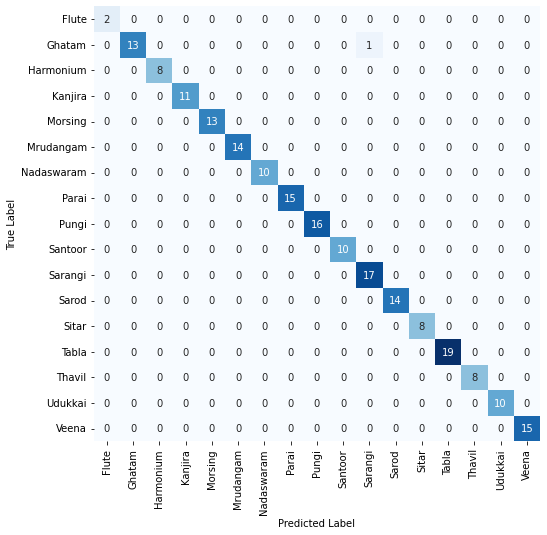

accuracy for 2 layers :  0.9950980392156863


In [8]:
# CNN with 2 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 2 layers : ",accuracy_score(y_test,predictions))

Epoch 1/20
26/26 [==============================] - 6s 218ms/step - loss: 13.2405 - acc: 0.0944 - val_loss: 12.9748 - val_acc: 0.1961
Epoch 2/20
26/26 [==============================] - 5s 203ms/step - loss: 13.4828 - acc: 0.1605 - val_loss: 12.9641 - val_acc: 0.1961
Epoch 3/20
26/26 [==============================] - 5s 200ms/step - loss: 13.5134 - acc: 0.1618 - val_loss: 12.9621 - val_acc: 0.1961
Epoch 4/20
26/26 [==============================] - 5s 203ms/step - loss: 13.6505 - acc: 0.1532 - val_loss: 12.9621 - val_acc: 0.1961
Epoch 5/20
26/26 [==============================] - 5s 204ms/step - loss: 13.4918 - acc: 0.1630 - val_loss: 12.9602 - val_acc: 0.1961
Epoch 6/20
26/26 [==============================] - 5s 207ms/step - loss: 13.5111 - acc: 0.1618 - val_loss: 12.9588 - val_acc: 0.1961
Epoch 7/20
26/26 [==============================] - 5s 201ms/step - loss: 13.5109 - acc: 0.1618 - val_loss: 12.9586 - val_acc: 0.1961
Epoch 8/20
26/26 [==============================] - 6s 214ms/s

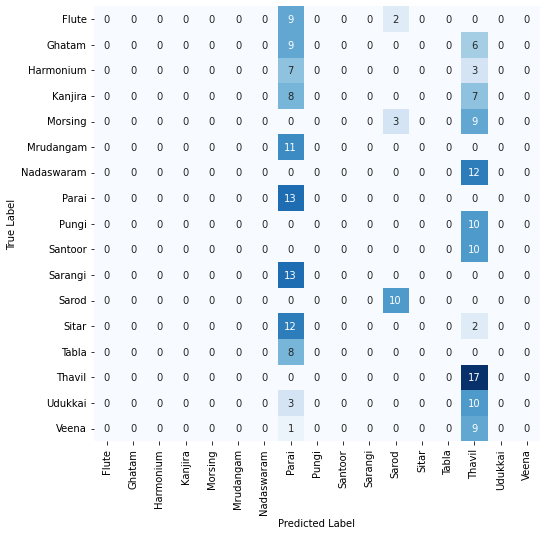

accuracy for 2 layers :  0.19607843137254902


In [9]:
# CNN with 2 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(17, activation='softmax'))
model.add(Dropout(0.05))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 2 layers : ",accuracy_score(y_test,predictions))

Epoch 1/20
26/26 [==============================] - 6s 227ms/step - loss: 11.3731 - acc: 0.2096 - val_loss: 9.9261 - val_acc: 0.3676
Epoch 2/20
26/26 [==============================] - 5s 210ms/step - loss: 11.1942 - acc: 0.3002 - val_loss: 9.8316 - val_acc: 0.3824
Epoch 3/20
26/26 [==============================] - 5s 207ms/step - loss: 8.2217 - acc: 0.2819 - val_loss: 2.1977 - val_acc: 0.3480
Epoch 4/20
26/26 [==============================] - 5s 205ms/step - loss: 2.3917 - acc: 0.7096 - val_loss: 0.2561 - val_acc: 0.9363
Epoch 5/20
26/26 [==============================] - 5s 205ms/step - loss: 1.8223 - acc: 0.8615 - val_loss: 0.1182 - val_acc: 0.9853
Epoch 6/20
26/26 [==============================] - 5s 208ms/step - loss: 1.7640 - acc: 0.8909 - val_loss: 0.0587 - val_acc: 0.9853
Epoch 7/20
26/26 [==============================] - 5s 205ms/step - loss: 1.8090 - acc: 0.8885 - val_loss: 0.0402 - val_acc: 0.9951
Epoch 8/20
26/26 [==============================] - 5s 205ms/step - loss: 

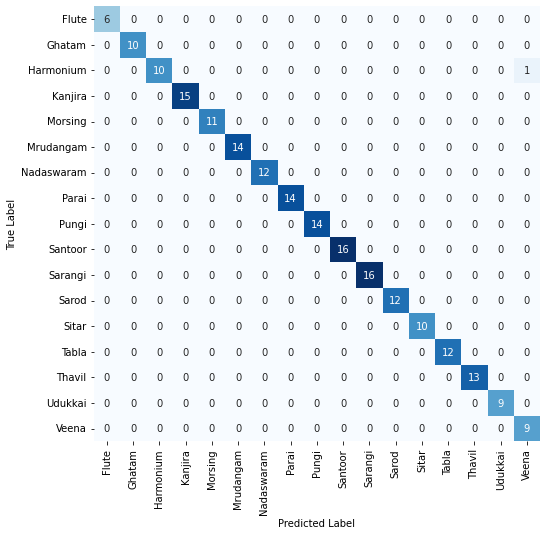

accuracy for 2 layers :  0.9950980392156863


In [10]:
# CNN with 2 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(17, activation='softmax'))
model.add(Dropout(0.1))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 2 layers : ",accuracy_score(y_test,predictions))

Epoch 1/20
26/26 [==============================] - 9s 337ms/step - loss: 13.6543 - acc: 0.1054 - val_loss: 11.8705 - val_acc: 0.1961
Epoch 2/20
26/26 [==============================] - 7s 256ms/step - loss: 9.6295 - acc: 0.2218 - val_loss: 2.7174 - val_acc: 0.0588
Epoch 3/20
26/26 [==============================] - 5s 210ms/step - loss: 4.7163 - acc: 0.4424 - val_loss: 0.7009 - val_acc: 0.8186
Epoch 4/20
26/26 [==============================] - 6s 216ms/step - loss: 3.1635 - acc: 0.7721 - val_loss: 0.3694 - val_acc: 0.9020
Epoch 5/20
26/26 [==============================] - 5s 211ms/step - loss: 3.3625 - acc: 0.7770 - val_loss: 0.3136 - val_acc: 0.8922
Epoch 6/20
26/26 [==============================] - 5s 210ms/step - loss: 3.2291 - acc: 0.7929 - val_loss: 0.1279 - val_acc: 0.9706
Epoch 7/20
26/26 [==============================] - 6s 223ms/step - loss: 3.2363 - acc: 0.7990 - val_loss: 0.0837 - val_acc: 0.9853
Epoch 8/20
26/26 [==============================] - 6s 219ms/step - loss: 

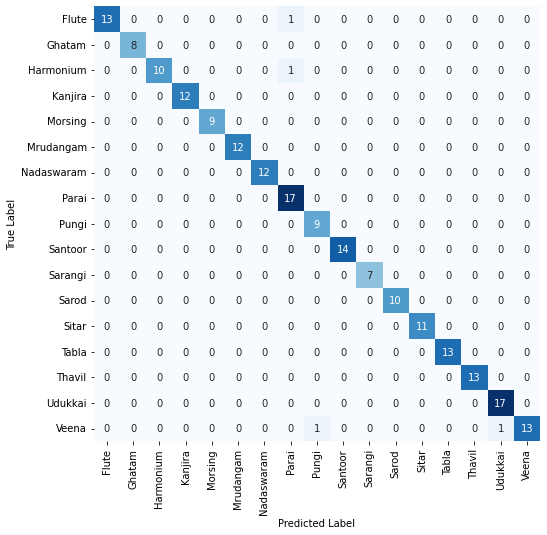

accuracy for 2 layers :  0.9803921568627451


In [11]:
# CNN with 2 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(17, activation='softmax'))
model.add(Dropout(0.2))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 2 layers : ",accuracy_score(y_test,predictions))

Epoch 1/20
26/26 [==============================] - 11s 410ms/step - loss: 4.7931 - acc: 0.0699 - val_loss: 2.8279 - val_acc: 0.0441
Epoch 2/20
26/26 [==============================] - 9s 350ms/step - loss: 2.7880 - acc: 0.0637 - val_loss: 2.7695 - val_acc: 0.0441
Epoch 3/20
26/26 [==============================] - 10s 370ms/step - loss: 2.7121 - acc: 0.0699 - val_loss: 2.7071 - val_acc: 0.0833
Epoch 4/20
26/26 [==============================] - 9s 345ms/step - loss: 2.6260 - acc: 0.1213 - val_loss: 2.6654 - val_acc: 0.0882
Epoch 5/20
26/26 [==============================] - 9s 355ms/step - loss: 2.5382 - acc: 0.1642 - val_loss: 2.5545 - val_acc: 0.1176
Epoch 6/20
26/26 [==============================] - 9s 341ms/step - loss: 2.4510 - acc: 0.1814 - val_loss: 2.4815 - val_acc: 0.1324
Epoch 7/20
26/26 [==============================] - 9s 339ms/step - loss: 2.3788 - acc: 0.1887 - val_loss: 2.4078 - val_acc: 0.1471
Epoch 8/20
26/26 [==============================] - 9s 342ms/step - loss: 

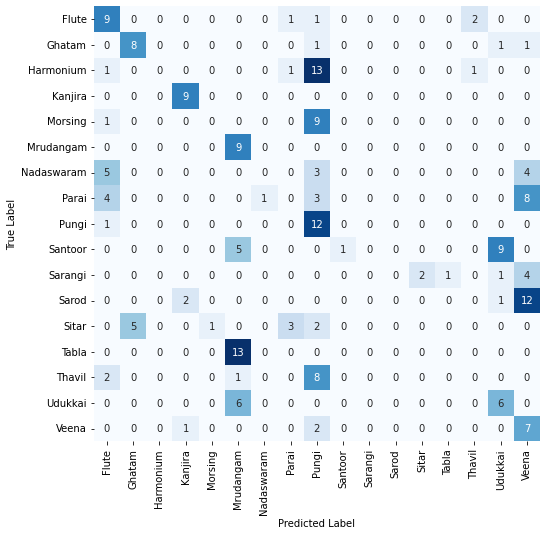

accuracy for 4 layers :  0.29901960784313725


In [12]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 14s 520ms/step - loss: 4.2344 - acc: 0.0625 - val_loss: 2.6806 - val_acc: 0.1863
Epoch 2/20
26/26 [==============================] - 13s 515ms/step - loss: 2.5558 - acc: 0.2181 - val_loss: 2.2396 - val_acc: 0.3480
Epoch 3/20
26/26 [==============================] - 13s 493ms/step - loss: 1.9375 - acc: 0.4755 - val_loss: 1.5893 - val_acc: 0.5392
Epoch 4/20
26/26 [==============================] - 13s 485ms/step - loss: 1.2060 - acc: 0.7022 - val_loss: 0.9851 - val_acc: 0.6765
Epoch 5/20
26/26 [==============================] - 13s 521ms/step - loss: 0.7015 - acc: 0.8542 - val_loss: 0.6424 - val_acc: 0.8382
Epoch 6/20
26/26 [==============================] - 13s 519ms/step - loss: 0.4038 - acc: 0.9400 - val_loss: 0.4083 - val_acc: 0.9314
Epoch 7/20
26/26 [==============================] - 16s 612ms/step - loss: 0.2580 - acc: 0.9669 - val_loss: 0.3432 - val_acc: 0.9265
Epoch 8/20
26/26 [==============================] - 17s 656ms/step - 

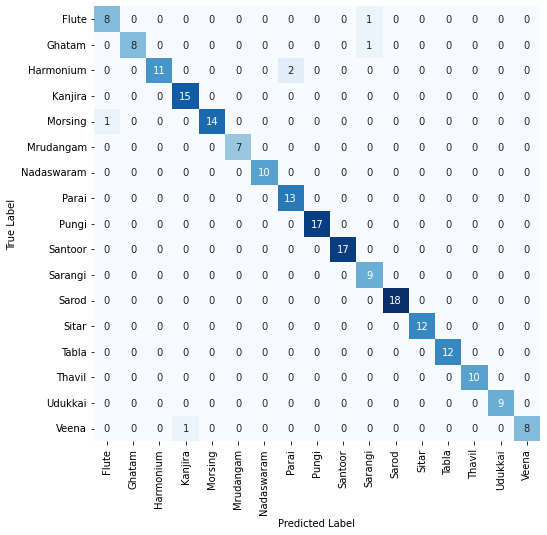

accuracy for 4 layers :  0.9705882352941176


In [13]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 11s 403ms/step - loss: 6.1976 - acc: 0.0723 - val_loss: 2.7935 - val_acc: 0.0931
Epoch 2/20
26/26 [==============================] - 11s 409ms/step - loss: 2.7971 - acc: 0.0686 - val_loss: 2.7789 - val_acc: 0.0392
Epoch 3/20
26/26 [==============================] - 10s 383ms/step - loss: 2.7556 - acc: 0.1017 - val_loss: 2.7456 - val_acc: 0.0490
Epoch 4/20
26/26 [==============================] - 10s 377ms/step - loss: 2.7085 - acc: 0.1176 - val_loss: 2.7105 - val_acc: 0.0686
Epoch 5/20
26/26 [==============================] - 11s 409ms/step - loss: 2.6621 - acc: 0.1507 - val_loss: 2.6600 - val_acc: 0.1225
Epoch 6/20
26/26 [==============================] - 11s 421ms/step - loss: 2.5957 - acc: 0.1544 - val_loss: 2.5817 - val_acc: 0.1471
Epoch 7/20
26/26 [==============================] - 10s 395ms/step - loss: 2.5156 - acc: 0.1949 - val_loss: 2.5134 - val_acc: 0.1912
Epoch 8/20
26/26 [==============================] - 10s 374ms/step - 

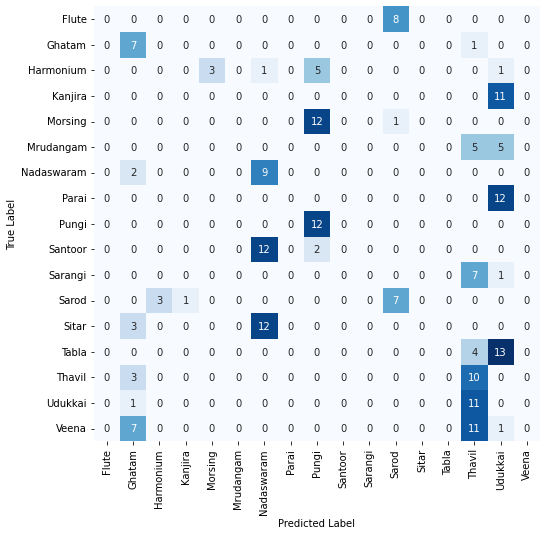

accuracy for 4 layers :  0.22058823529411764


In [14]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 12s 390ms/step - loss: 5.1812 - acc: 0.0723 - val_loss: 2.8118 - val_acc: 0.0931
Epoch 2/20
26/26 [==============================] - 11s 396ms/step - loss: 2.8233 - acc: 0.0686 - val_loss: 2.7846 - val_acc: 0.0588
Epoch 3/20
26/26 [==============================] - 12s 456ms/step - loss: 2.7599 - acc: 0.0600 - val_loss: 2.7366 - val_acc: 0.0735
Epoch 4/20
26/26 [==============================] - 10s 392ms/step - loss: 2.7079 - acc: 0.0600 - val_loss: 2.6720 - val_acc: 0.0931
Epoch 5/20
26/26 [==============================] - 9s 362ms/step - loss: 2.6485 - acc: 0.0833 - val_loss: 2.6556 - val_acc: 0.0882
Epoch 6/20
26/26 [==============================] - 13s 509ms/step - loss: 2.5798 - acc: 0.1238 - val_loss: 2.5611 - val_acc: 0.1275
Epoch 7/20
26/26 [==============================] - 14s 522ms/step - loss: 2.5218 - acc: 0.1544 - val_loss: 2.4988 - val_acc: 0.2108
Epoch 8/20
26/26 [==============================] - 11s 417ms/step - l

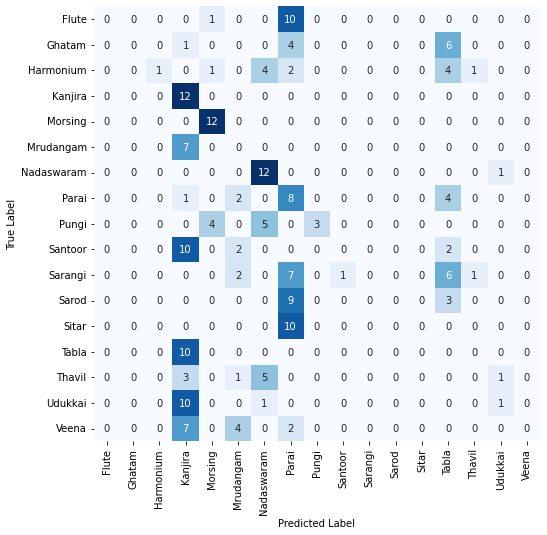

accuracy for 4 layers :  0.24019607843137256


In [15]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 11s 393ms/step - loss: 4.2581 - acc: 0.0809 - val_loss: 2.7857 - val_acc: 0.0441
Epoch 2/20
26/26 [==============================] - 9s 358ms/step - loss: 2.6531 - acc: 0.1324 - val_loss: 2.6162 - val_acc: 0.1422
Epoch 3/20
26/26 [==============================] - 9s 363ms/step - loss: 2.5356 - acc: 0.1642 - val_loss: 2.4353 - val_acc: 0.1814
Epoch 4/20
26/26 [==============================] - 11s 413ms/step - loss: 2.3902 - acc: 0.1826 - val_loss: 2.3013 - val_acc: 0.2402
Epoch 5/20
26/26 [==============================] - 10s 401ms/step - loss: 2.2730 - acc: 0.1973 - val_loss: 2.1949 - val_acc: 0.2304
Epoch 6/20
26/26 [==============================] - 10s 403ms/step - loss: 2.1557 - acc: 0.2047 - val_loss: 2.1057 - val_acc: 0.2843
Epoch 7/20
26/26 [==============================] - 10s 395ms/step - loss: 2.0792 - acc: 0.2806 - val_loss: 2.0423 - val_acc: 0.3725
Epoch 8/20
26/26 [==============================] - 10s 396ms/step - lo

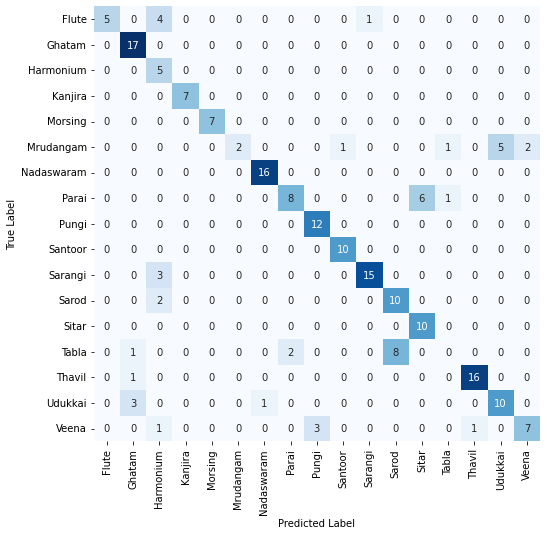

accuracy for 4 layers :  0.7696078431372549


In [16]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 18s 620ms/step - loss: 6.6897 - acc: 0.0748 - val_loss: 2.5120 - val_acc: 0.2059
Epoch 2/20
26/26 [==============================] - 17s 644ms/step - loss: 2.2282 - acc: 0.3529 - val_loss: 1.7126 - val_acc: 0.5147
Epoch 3/20
26/26 [==============================] - 15s 598ms/step - loss: 1.3333 - acc: 0.6348 - val_loss: 0.8706 - val_acc: 0.8284
Epoch 4/20
26/26 [==============================] - 15s 564ms/step - loss: 0.6708 - acc: 0.8689 - val_loss: 0.4467 - val_acc: 0.9314
Epoch 5/20
26/26 [==============================] - 13s 517ms/step - loss: 0.4102 - acc: 0.9179 - val_loss: 0.3756 - val_acc: 0.9265
Epoch 6/20
26/26 [==============================] - 13s 518ms/step - loss: 0.2795 - acc: 0.9400 - val_loss: 0.3114 - val_acc: 0.9265
Epoch 7/20
26/26 [==============================] - 14s 531ms/step - loss: 0.1972 - acc: 0.9571 - val_loss: 0.1953 - val_acc: 0.9657
Epoch 8/20
26/26 [==============================] - 14s 537ms/step - 

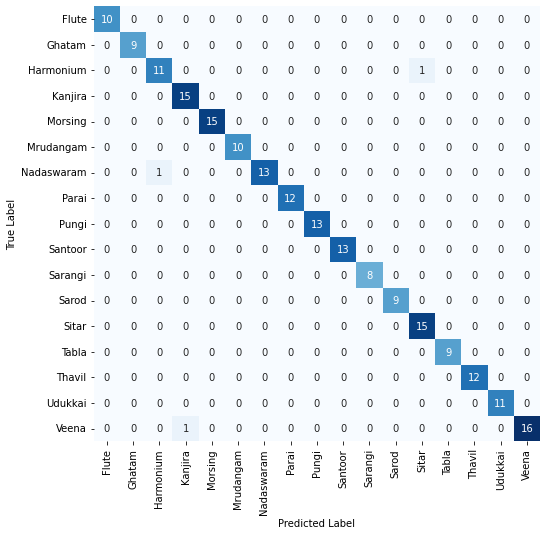

accuracy for 4 layers :  0.9852941176470589


In [17]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 16s 574ms/step - loss: 6.4574 - acc: 0.0674 - val_loss: 2.7314 - val_acc: 0.1176
Epoch 2/20
26/26 [==============================] - 13s 504ms/step - loss: 2.4922 - acc: 0.2083 - val_loss: 2.2575 - val_acc: 0.2892
Epoch 3/20
26/26 [==============================] - 21s 826ms/step - loss: 1.9263 - acc: 0.4461 - val_loss: 1.5538 - val_acc: 0.6569
Epoch 4/20
26/26 [==============================] - 14s 527ms/step - loss: 1.3729 - acc: 0.6017 - val_loss: 1.0260 - val_acc: 0.8382
Epoch 5/20
26/26 [==============================] - 13s 508ms/step - loss: 0.9310 - acc: 0.7500 - val_loss: 0.7240 - val_acc: 0.8627
Epoch 6/20
26/26 [==============================] - 13s 502ms/step - loss: 0.6837 - acc: 0.8137 - val_loss: 0.6776 - val_acc: 0.8431
Epoch 7/20
26/26 [==============================] - 13s 505ms/step - loss: 0.5759 - acc: 0.8615 - val_loss: 0.4378 - val_acc: 0.9216
Epoch 8/20
26/26 [==============================] - 14s 525ms/step - 

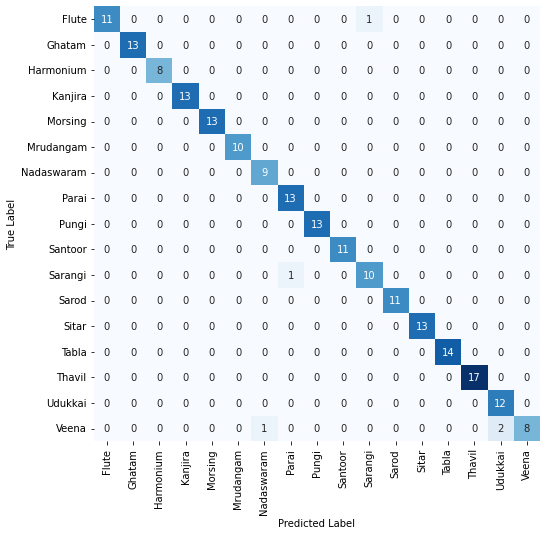

accuracy for 4 layers :  0.9754901960784313


In [18]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 22s 758ms/step - loss: 5.3738 - acc: 0.1115 - val_loss: 2.5205 - val_acc: 0.2010
Epoch 2/20
26/26 [==============================] - 17s 648ms/step - loss: 2.3541 - acc: 0.2721 - val_loss: 2.0983 - val_acc: 0.4363
Epoch 3/20
26/26 [==============================] - 19s 712ms/step - loss: 1.9350 - acc: 0.4191 - val_loss: 1.6676 - val_acc: 0.6225
Epoch 4/20
26/26 [==============================] - 19s 727ms/step - loss: 1.5085 - acc: 0.5355 - val_loss: 1.1963 - val_acc: 0.7990
Epoch 5/20
26/26 [==============================] - 20s 778ms/step - loss: 1.1811 - acc: 0.6520 - val_loss: 0.9249 - val_acc: 0.8824
Epoch 6/20
26/26 [==============================] - 20s 758ms/step - loss: 0.9747 - acc: 0.7083 - val_loss: 0.7463 - val_acc: 0.8824
Epoch 7/20
26/26 [==============================] - 17s 656ms/step - loss: 0.8135 - acc: 0.7708 - val_loss: 0.7042 - val_acc: 0.8088
Epoch 8/20
26/26 [==============================] - 17s 655ms/step - 

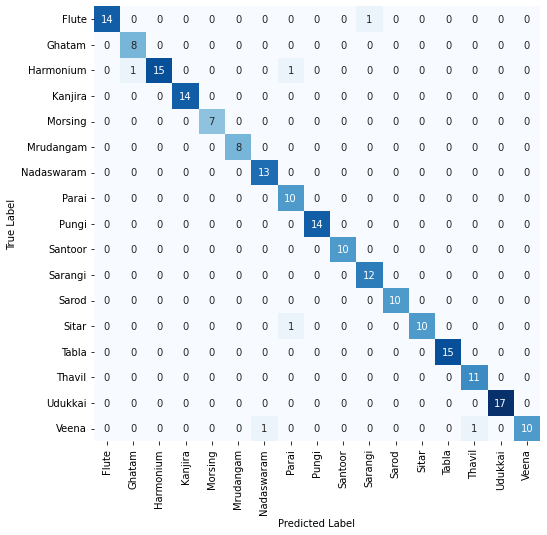

accuracy for 4 layers :  0.9705882352941176


In [19]:
# CNN with 4 layers

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 4 layers : ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 16s 573ms/step - loss: 2.8563 - acc: 0.0821 - val_loss: 2.7564 - val_acc: 0.0931
Epoch 2/20
26/26 [==============================] - 16s 608ms/step - loss: 2.4681 - acc: 0.2108 - val_loss: 2.1227 - val_acc: 0.3333
Epoch 3/20
26/26 [==============================] - 14s 542ms/step - loss: 1.7442 - acc: 0.4828 - val_loss: 1.3506 - val_acc: 0.6863
Epoch 4/20
26/26 [==============================] - 15s 563ms/step - loss: 1.0453 - acc: 0.7402 - val_loss: 1.0629 - val_acc: 0.6765
Epoch 5/20
26/26 [==============================] - 14s 531ms/step - loss: 0.5871 - acc: 0.8603 - val_loss: 0.4430 - val_acc: 0.9167
Epoch 6/20
26/26 [==============================] - 15s 562ms/step - loss: 0.2772 - acc: 0.9412 - val_loss: 0.2945 - val_acc: 0.9461
Epoch 7/20
26/26 [==============================] - 14s 534ms/step - loss: 0.1800 - acc: 0.9657 - val_loss: 0.2327 - val_acc: 0.9216
Epoch 8/20
26/26 [==============================] - 14s 525ms/step - 

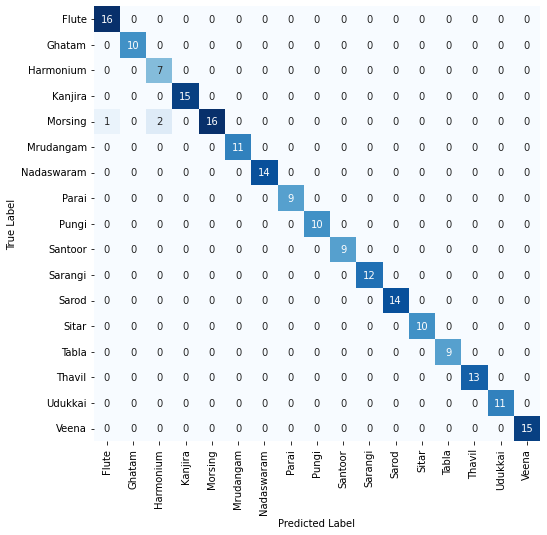

accuracy for 6 layers and dropout:  0.9852941176470589


In [20]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 15s 529ms/step - loss: 2.8902 - acc: 0.0821 - val_loss: 2.8001 - val_acc: 0.1176
Epoch 2/20
26/26 [==============================] - 13s 499ms/step - loss: 2.4874 - acc: 0.2696 - val_loss: 2.0332 - val_acc: 0.4069
Epoch 3/20
26/26 [==============================] - 14s 522ms/step - loss: 1.4266 - acc: 0.5980 - val_loss: 1.0967 - val_acc: 0.6176
Epoch 4/20
26/26 [==============================] - 13s 491ms/step - loss: 0.8008 - acc: 0.7439 - val_loss: 0.6942 - val_acc: 0.7745
Epoch 5/20
26/26 [==============================] - 13s 482ms/step - loss: 0.5893 - acc: 0.8321 - val_loss: 0.5482 - val_acc: 0.8333
Epoch 6/20
26/26 [==============================] - 13s 512ms/step - loss: 0.4083 - acc: 0.8909 - val_loss: 0.5167 - val_acc: 0.8235
Epoch 7/20
26/26 [==============================] - 13s 499ms/step - loss: 0.2702 - acc: 0.9461 - val_loss: 0.3527 - val_acc: 0.8922
Epoch 8/20
26/26 [==============================] - 12s 452ms/step - 

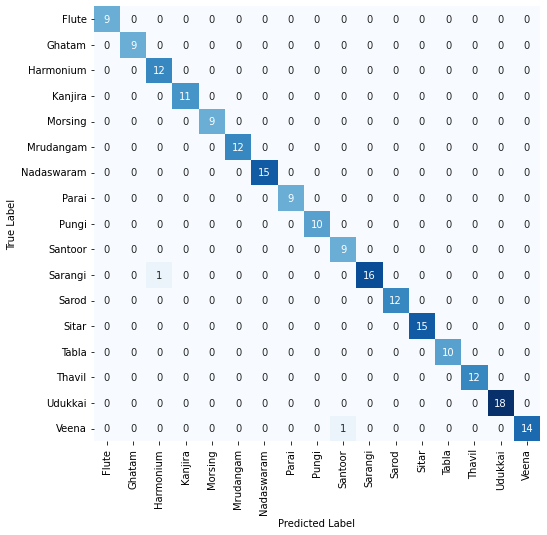

accuracy for 6 layers and dropout:  0.9901960784313726


In [21]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 14s 519ms/step - loss: 2.7361 - acc: 0.1777 - val_loss: 2.5129 - val_acc: 0.2402
Epoch 2/20
26/26 [==============================] - 13s 508ms/step - loss: 1.9154 - acc: 0.4669 - val_loss: 1.4875 - val_acc: 0.6225
Epoch 3/20
26/26 [==============================] - 13s 499ms/step - loss: 1.1099 - acc: 0.6642 - val_loss: 0.8332 - val_acc: 0.7647
Epoch 4/20
26/26 [==============================] - 13s 495ms/step - loss: 0.6110 - acc: 0.8456 - val_loss: 0.6916 - val_acc: 0.8235
Epoch 5/20
26/26 [==============================] - 14s 530ms/step - loss: 0.4018 - acc: 0.8983 - val_loss: 0.3590 - val_acc: 0.8971
Epoch 6/20
26/26 [==============================] - 13s 511ms/step - loss: 0.2933 - acc: 0.9191 - val_loss: 0.2979 - val_acc: 0.9118
Epoch 7/20
26/26 [==============================] - 13s 517ms/step - loss: 0.2175 - acc: 0.9485 - val_loss: 0.2386 - val_acc: 0.9412
Epoch 8/20
26/26 [==============================] - 13s 509ms/step - 

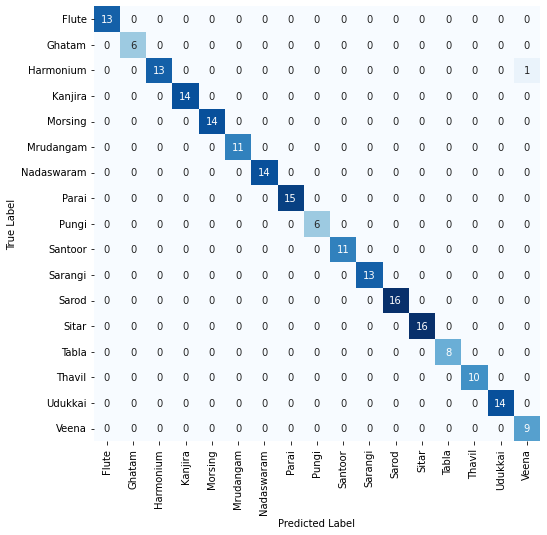

accuracy for 6 layers and dropout:  0.9950980392156863


In [22]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 12s 436ms/step - loss: 2.8641 - acc: 0.0993 - val_loss: 2.7360 - val_acc: 0.1225
Epoch 2/20
26/26 [==============================] - 11s 415ms/step - loss: 2.5144 - acc: 0.2083 - val_loss: 2.1919 - val_acc: 0.2941
Epoch 3/20
26/26 [==============================] - 11s 407ms/step - loss: 1.8364 - acc: 0.4203 - val_loss: 1.3906 - val_acc: 0.6029
Epoch 4/20
26/26 [==============================] - 11s 406ms/step - loss: 1.2768 - acc: 0.5944 - val_loss: 1.0580 - val_acc: 0.6373
Epoch 5/20
26/26 [==============================] - 11s 405ms/step - loss: 0.9186 - acc: 0.7034 - val_loss: 0.7240 - val_acc: 0.8382
Epoch 6/20
26/26 [==============================] - 10s 401ms/step - loss: 0.7453 - acc: 0.7721 - val_loss: 0.4642 - val_acc: 0.8873
Epoch 7/20
26/26 [==============================] - 11s 408ms/step - loss: 0.5219 - acc: 0.8505 - val_loss: 0.4476 - val_acc: 0.8480
Epoch 8/20
26/26 [==============================] - 11s 412ms/step - 

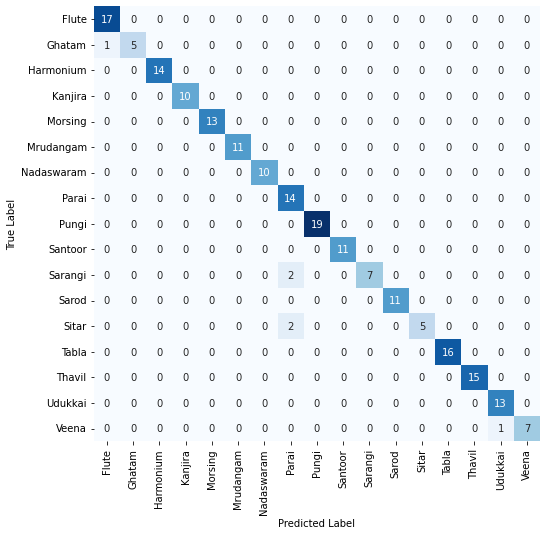

accuracy for 6 layers and dropout:  0.9705882352941176


In [23]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 11s 407ms/step - loss: 2.8544 - acc: 0.0784 - val_loss: 2.7638 - val_acc: 0.1422
Epoch 2/20
26/26 [==============================] - 10s 398ms/step - loss: 2.5119 - acc: 0.2157 - val_loss: 2.0698 - val_acc: 0.3137
Epoch 3/20
26/26 [==============================] - 10s 403ms/step - loss: 1.8839 - acc: 0.3627 - val_loss: 1.4024 - val_acc: 0.6324
Epoch 4/20
26/26 [==============================] - 11s 423ms/step - loss: 1.3412 - acc: 0.5551 - val_loss: 1.0009 - val_acc: 0.7157
Epoch 5/20
26/26 [==============================] - 11s 406ms/step - loss: 0.9259 - acc: 0.7218 - val_loss: 0.7076 - val_acc: 0.7990
Epoch 6/20
26/26 [==============================] - 10s 402ms/step - loss: 0.7271 - acc: 0.7733 - val_loss: 0.5906 - val_acc: 0.8284
Epoch 7/20
26/26 [==============================] - 11s 409ms/step - loss: 0.5672 - acc: 0.8407 - val_loss: 0.5055 - val_acc: 0.8137
Epoch 8/20
26/26 [==============================] - 11s 413ms/step - 

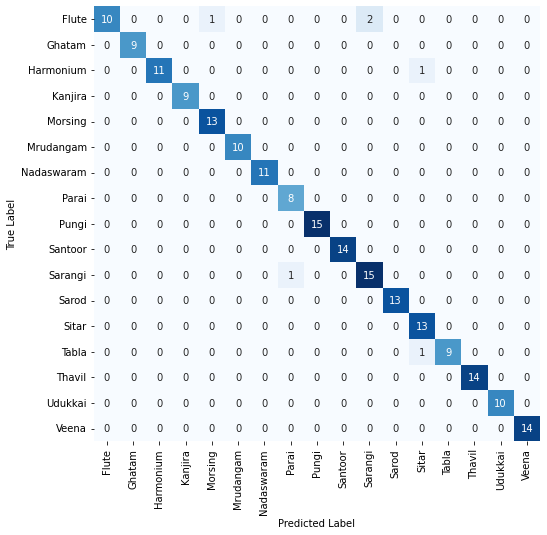

accuracy for 6 layers and dropout:  0.9705882352941176


In [24]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 13s 492ms/step - loss: 2.7855 - acc: 0.1360 - val_loss: 2.4087 - val_acc: 0.2598
Epoch 2/20
26/26 [==============================] - 12s 458ms/step - loss: 1.9553 - acc: 0.3873 - val_loss: 1.4227 - val_acc: 0.6520
Epoch 3/20
26/26 [==============================] - 11s 434ms/step - loss: 0.9921 - acc: 0.6998 - val_loss: 0.7254 - val_acc: 0.8088
Epoch 4/20
26/26 [==============================] - 13s 483ms/step - loss: 0.5372 - acc: 0.8725 - val_loss: 0.4302 - val_acc: 0.8873
Epoch 5/20
26/26 [==============================] - 11s 430ms/step - loss: 0.3251 - acc: 0.9216 - val_loss: 0.2987 - val_acc: 0.9559
Epoch 6/20
26/26 [==============================] - 11s 438ms/step - loss: 0.2129 - acc: 0.9510 - val_loss: 0.2221 - val_acc: 0.9510
Epoch 7/20
26/26 [==============================] - 11s 437ms/step - loss: 0.1507 - acc: 0.9608 - val_loss: 0.1960 - val_acc: 0.9265
Epoch 8/20
26/26 [==============================] - 11s 432ms/step - 

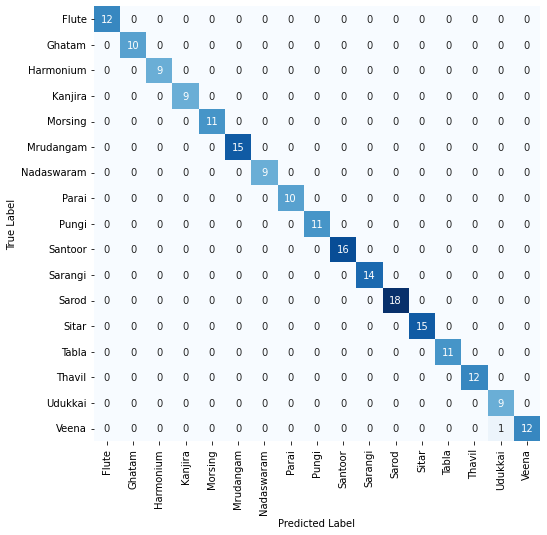

accuracy for 6 layers and dropout:  0.9950980392156863


In [25]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 13s 474ms/step - loss: 2.8332 - acc: 0.1029 - val_loss: 2.7159 - val_acc: 0.1716
Epoch 2/20
26/26 [==============================] - 12s 449ms/step - loss: 2.4134 - acc: 0.2304 - val_loss: 2.1021 - val_acc: 0.4020
Epoch 3/20
26/26 [==============================] - 12s 461ms/step - loss: 1.5363 - acc: 0.5588 - val_loss: 1.2550 - val_acc: 0.6618
Epoch 4/20
26/26 [==============================] - 11s 442ms/step - loss: 1.0119 - acc: 0.6789 - val_loss: 0.7922 - val_acc: 0.8186
Epoch 5/20
26/26 [==============================] - 12s 457ms/step - loss: 0.6485 - acc: 0.8051 - val_loss: 0.6244 - val_acc: 0.8235
Epoch 6/20
26/26 [==============================] - 12s 444ms/step - loss: 0.5027 - acc: 0.8664 - val_loss: 0.5440 - val_acc: 0.8775
Epoch 7/20
26/26 [==============================] - 11s 441ms/step - loss: 0.4632 - acc: 0.8529 - val_loss: 0.4466 - val_acc: 0.8725
Epoch 8/20
26/26 [==============================] - 11s 438ms/step - 

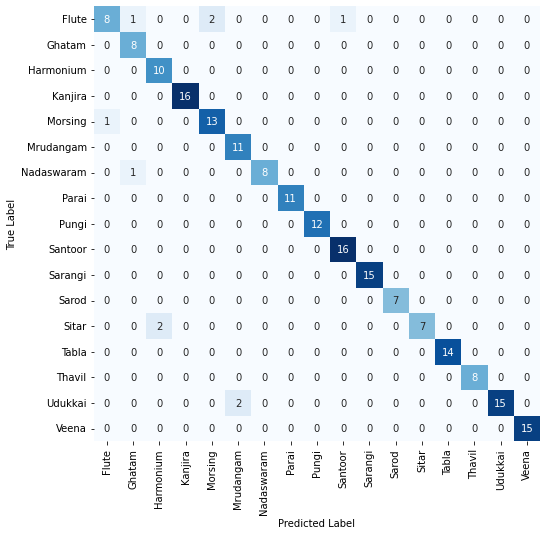

accuracy for 6 layers and dropout:  0.9509803921568627


In [26]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))


Epoch 1/20
26/26 [==============================] - 12s 451ms/step - loss: 2.8806 - acc: 0.0797 - val_loss: 2.7275 - val_acc: 0.0882
Epoch 2/20
26/26 [==============================] - 12s 464ms/step - loss: 2.3087 - acc: 0.3051 - val_loss: 1.9616 - val_acc: 0.3137
Epoch 3/20
26/26 [==============================] - 12s 469ms/step - loss: 1.5215 - acc: 0.5257 - val_loss: 1.1629 - val_acc: 0.6225
Epoch 4/20
26/26 [==============================] - 11s 437ms/step - loss: 0.9671 - acc: 0.6936 - val_loss: 0.8267 - val_acc: 0.7157
Epoch 5/20
26/26 [==============================] - 12s 453ms/step - loss: 0.7188 - acc: 0.7733 - val_loss: 0.6275 - val_acc: 0.7892
Epoch 6/20
26/26 [==============================] - 11s 437ms/step - loss: 0.5336 - acc: 0.8309 - val_loss: 0.6151 - val_acc: 0.7843
Epoch 7/20
26/26 [==============================] - 11s 429ms/step - loss: 0.4048 - acc: 0.8787 - val_loss: 0.4099 - val_acc: 0.8824
Epoch 8/20
26/26 [==============================] - 12s 452ms/step - 

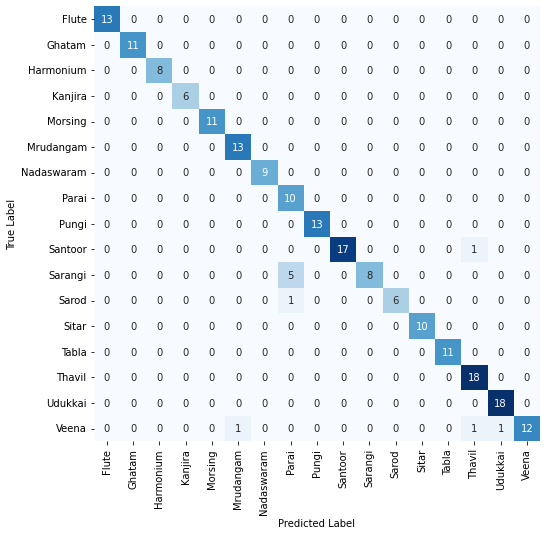

accuracy for 6 layers and dropout:  0.9509803921568627


In [27]:
# CNN with 6 layers + dropout

#test-train split and reshape to 4D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(40, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(20, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy for 6 layers and dropout: ",accuracy_score(y_test,predictions))
